# Child & Infant Mortality
_____________________________________________________________________________________________________________________
One in every 100 children dies before completing one year of life. Around 68 percent of infant mortality is attributed to deaths of children before completing 1 month.
15,000 children die every day – Child mortality is an everyday tragedy of enormous scale that rarely makes the headlines
Child mortality rates have declined in all world regions, but the world is not on track to reach the Sustainable Development Goal for child mortality
Before the Modern Revolution child mortality was very high in all societies that we have knowledge of – a quarter of all children died in the first year of life, almost half died before reaching the end of puberty
Over the last two centuries all countries in the world have made very rapid progress against child mortality. From 1800 to 1950 global mortality has halved from around 43% to 22.5%. Since 1950 the mortality rate has declined five-fold to 4.5% in 2015. All countries in the world have benefitted from this progress
_____________________________________________________________________________________________________________________
#### Participants 

- Colchado Avalos Jorge
- Duran Carrasco Uriel
- Meraz Olivas Jhoel Francisco
- Mora Campos Carlos Eduardo
- Santacruz Espino Rodrigo

#### Hypothesis.
$H_0$ : 
<br/>
$H_1$ :


## Import Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import trim_mean

from statsmodels import robust
import wquantiles

%matplotlib inline
sns.set()
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

## Initializing Datasets

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'Datasets'

CHILDREN_DEAD = DATA / 'Children-woman-death-vs-survival.csv'
CAUSES_OF_DEAD = DATA / 'causes-of-death-in-children.csv'
DEATHS_BY_AGE = DATA / 'child-deaths-by-age.csv'
CHILD_MORTALITY_BY_AGE = DATA / 'child-mortality-by-sex.csv'

In [3]:
df_children_dead = pd.read_csv(CHILDREN_DEAD)
df_causes_of_dead = pd.read_csv(CAUSES_OF_DEAD)
df_deaths_by_age = pd.read_csv(DEATHS_BY_AGE)

In [4]:
print("df_children_dead: ", df_children_dead.shape)
print("df_deaths_by_age: ", df_deaths_by_age.shape)
print("df_causes_of_dead: ", df_causes_of_dead.shape)

df_children_dead:  (12792, 5)
df_deaths_by_age:  (6840, 7)
df_causes_of_dead:  (6840, 20)


In [5]:
df_causes_age = df_deaths_by_age.merge(df_causes_of_dead, how='inner')

## Measures of central tendency
- Mean
- Trimmed Mean
- Median
- Mode

In [6]:
print("Mean of Children that died before 5 years of age per woman: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mean())
print("Trimmed Mean of Children that died before 5 years of age per woman: ", trim_mean(df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'], 0.1))
print("Median of Children that died before 5 years of age per woman: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].median())
print("Mode of Children that died before 5 years of age per woman: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mode()[0])

Mean of Children that died before 5 years of age per woman:  0.6017311377048156
Trimmed Mean of Children that died before 5 years of age per woman:  0.5012645857494625
Median of Children that died before 5 years of age per woman:  0.339934
Mode of Children that died before 5 years of age per woman:  0.003528


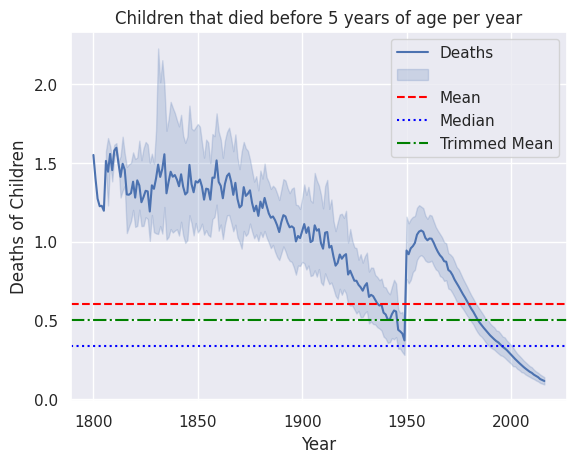

In [7]:
sns.lineplot(data=df_children_dead, x='Year', y='Children that died before 5 years of age per woman (based on Gapminder (2017))')
plt.ylabel('Deaths of Children')
plt.title('Children that died before 5 years of age per year')
plt.axhline(
    df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mean(),
    color="red",
    linestyle="--",
    label='Mean'
)
plt.axhline(
    df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].median(),
    color='blue',
    linestyle=":",
    label='Median'
)
plt.axhline(
    trim_mean(df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'],0.1),
    color='green',
    linestyle="-.",
    label='Trimmed Mean'
)
labels = ['Deaths', '', 'Mean', 'Median', 'Trimmed Mean']

plt.legend(labels)


## Variance, Standard Deviation, Range, Mean Deviation

In [8]:
print("Stardard Deviation: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].std())
print("Variance: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].var())
print("Range: ", \
df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].max() - df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].min()
)
print("Mean Deviation: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mad())

Stardard Deviation:  0.6481450563544375
Variance:  0.42009201407669694
Range:  3.4278958
Mean Deviation:  0.5348846408768809


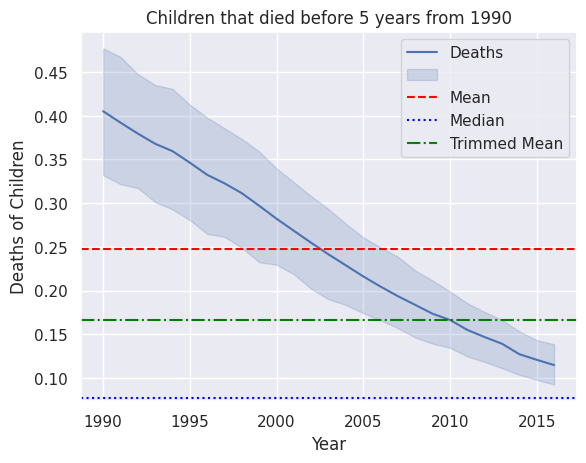

In [9]:
df_children_dead_from_90s = df_children_dead[df_children_dead['Year'] >= 1990]
sns.lineplot(data=df_children_dead_from_90s, x='Year', y='Children that died before 5 years of age per woman (based on Gapminder (2017))')
plt.ylabel('Deaths of Children')
plt.title('Children that died before 5 years from 1990')
plt.axhline(
    df_children_dead_from_90s['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mean(),
    color="red",
    linestyle="--",
    label='Mean'
)
plt.axhline(
    df_children_dead_from_90s['Children that died before 5 years of age per woman (based on Gapminder (2017))'].median(),
    color='blue',
    linestyle=":",
    label='Median'
)
plt.axhline(
    trim_mean(df_children_dead_from_90s['Children that died before 5 years of age per woman (based on Gapminder (2017))'],0.1),
    color='green',
    linestyle="-.",
    label='Trimmed Mean'
)
#labels = ['Deaths', '', 'Mean', 'Median', 'Trimmed Mean']

plt.legend(labels)


## Exploratory Data Analysis (EDA)

### Splitting Data by Epochs

In [10]:
years = df_causes_age.Year.unique()

In [11]:
def split_array(lst:list, split_in:int = 2):
    array_splitted = np.array_split(lst, split_in)
    array_result = []
    for i in range(len(array_splitted)):
        array_result.append([array_splitted[i][0], array_splitted[i][-1]])
    return array_result

In [12]:
Years = split_array(years, 4)

In [13]:
def get_epoch(year, epochs):
    for start, end in epochs:
        if start <= year <= end:
            return f"{start}-{end}"
    return "Other"

In [14]:
df_causes_age['Epoch'] = df_causes_age['Year'].apply(lambda x: get_epoch(x, Years))

In [15]:
death_causes_columns = df_causes_age.columns[3:-1]

In [16]:
mean_deaths_by_epoch = df_causes_age.groupby(['Entity', 'Epoch'])[death_causes_columns].mean().reset_index()

In [17]:
mean_deaths_by_epoch.head(2)

,Entity,Epoch,Deaths - All causes - Sex: Both - Age: 7-27 days (Number),Deaths - All causes - Sex: Both - Age: 1-4 years (Number),Deaths - All causes - Sex: Both - Age: 0-6 days (Number),Deaths - All causes - Sex: Both - Age: 28-364 days (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Meningitis - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),...,Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,1990-1997,13717.125,26572.500,22455.75,42937.625,43.000,17.750,2228.125,2361.625,...,17194.50,10300.250,678.875,2290.875,912.125,989.625,8644.50,7371.375,546.500,223.0
1,Afghanistan,1998-2005,14359.375,30308.375,25268.75,47109.000,261.125,30.875,2467.750,2474.500,...,19157.25,9299.875,856.125,2465.500,1046.375,1017.250,9002.25,11243.875,637.875,277.5


### Assigning Continent 

In [18]:
paises_por_continente = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic",
        "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon",
        "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar",
        "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
        "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan",
        "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Cape Verde", "Cote d'Ivoire"
    ],
    "America": [
        "Antigua and Barbuda", "Argentina", "Bahamas", "Barbados", "Belize", "Bolivia", "Brazil", "Canada", "Chile",
        "Colombia", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "Ecuador", "El Salvador", "Grenada",
        "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru",
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Suriname", "Trinidad and Tobago",
        "United States", "Uruguay", "Venezuela", "Bermuda", "Greenland", "Puerto Rico", "United States Virgin Islands"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China",
        "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan",
        "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal",
        "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea",
        "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates",
        "Uzbekistan", "Vietnam", "Yemen", "Timor", "Wales"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia",
        "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland",
        "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco",
        "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia",
        "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom",
        "Czechia", "Democratic Republic of Congo", "England", "Northern Ireland", "Scotland"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau",
        "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu", "American Samoa", "Cook Islands", 
        "Guam", "Micronesia (country)", "Niue", "Northern Mariana Islands", "Tokelau"
    ],
    "Regions_WHO_World_Bank": [
        "African Region (WHO)", "East Asia & Pacific (WB)", "Eastern Mediterranean Region (WHO)", 
        "Europe & Central Asia (WB)", "European Region (WHO)", "Latin America & Caribbean (WB)", 
        "Middle East & North Africa (WB)", "Region of the Americas (WHO)", "South Asia (WB)", 
        "South-East Asia Region (WHO)", "Sub-Saharan Africa (WB)", "Western Pacific Region (WHO)",
        "World", "World Bank High Income", "World Bank Low Income", "World Bank Lower Middle Income", 
        "World Bank Upper Middle Income", "North America (WB)"
    ]
}

In [19]:
def assign_continent(country):
    found = False
    
    for continent, countries in paises_por_continente.items():
        if country in countries:
            return continent
            found = True
            break
    
    if not found:
        return 'Other'

In [20]:
mean_deaths_by_epoch['Continent'] = mean_deaths_by_epoch['Entity'].apply(lambda x: assign_continent(x))

### Continent Analysis 

#### Continents Quantity in Dataset

In [21]:
count_continent = mean_deaths_by_epoch.groupby('Continent')['Entity'].nunique().reset_index()

Text(0.5, 1.0, 'Count of continents')

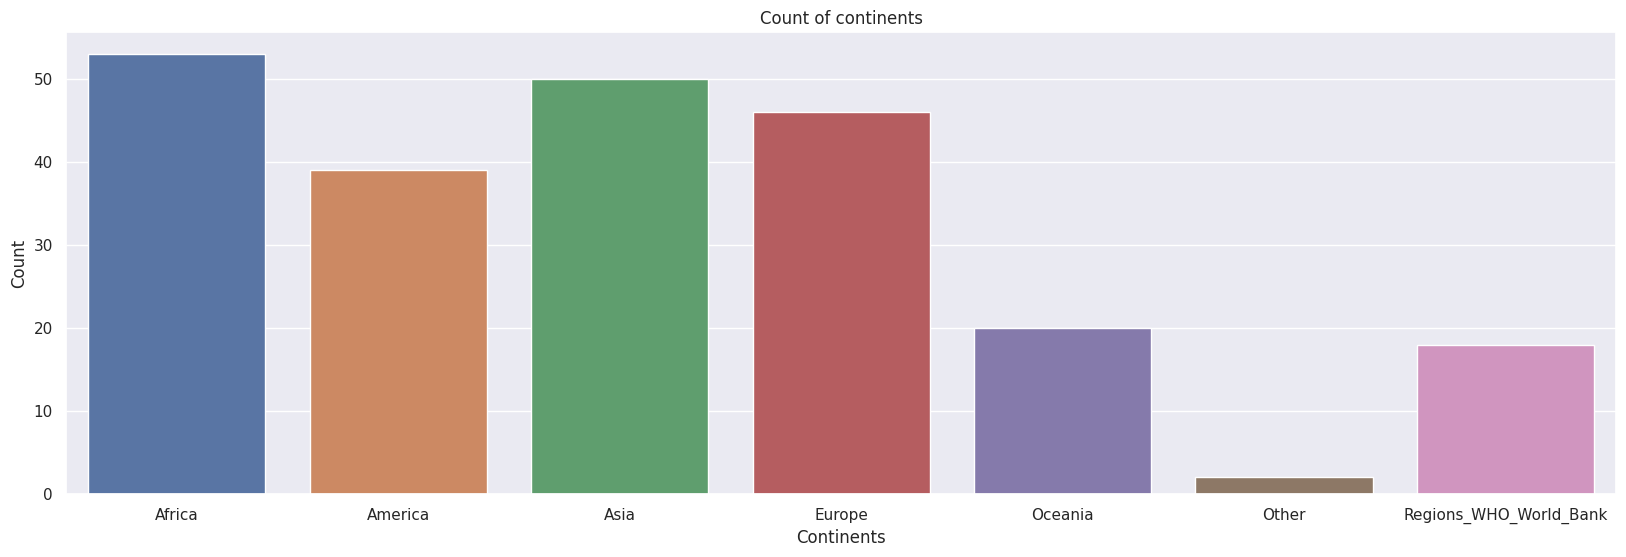

In [22]:
plt.figure(figsize=(20, 6)) 
sns.barplot(x = 'Continent', y= 'Entity', data=count_continent)
plt.ylabel('Count')
plt.xlabel('Continents')
plt.title('Count of continents')

#### Continent Deaths per Epoch

In [23]:
Epochs = mean_deaths_by_epoch.Epoch.unique()
Epochs

array(['1990-1997', '1998-2005', '2006-2012', '2013-2019'], dtype=object)

In [24]:
data_per_epoch = mean_deaths_by_epoch[['Epoch', 'Deaths - All causes - Sex: Both - Age: 7-27 days (Number)', 'Continent']]

In [25]:
data_per_epoch = mean_deaths_by_epoch.groupby(['Continent', 'Epoch'])\
['Deaths - All causes - Sex: Both - Age: 7-27 days (Number)', 'Deaths - All causes - Sex: Both - Age: 1-4 years (Number)', 
'Deaths - All causes - Sex: Both - Age: 0-6 days (Number)', 'Deaths - All causes - Sex: Both - Age: 28-364 days (Number)'].sum().reset_index()

In [26]:
def Paretto_diagram(column_deaths):
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 5))
    
    for epoch, ax in zip(Epochs, axes.flatten()):
        data_epoch = data_per_epoch.loc[data_per_epoch['Epoch'] == epoch]
        
        data_sorted = data_epoch.sort_values(by=column_deaths, ascending=False)
        total_deaths = data_sorted[column_deaths].sum()
        data_sorted['Cumulative_Percentage'] = data_sorted[column_deaths].cumsum() / total_deaths * 100
    
        sns.barplot(x=data_sorted.Continent, y=data_sorted[column_deaths], ax=ax, color='skyblue')
    
        ax2 = ax.twinx()
        ax2.plot(data_sorted.Continent, data_sorted['Cumulative_Percentage'], color='green', marker="o", ms=7)
        ax2.set_ylabel('Cumulative Percentage')
    
        ax.set_ylabel('Deaths')
        ax.set_title('Deaths of {}'.format(epoch))
    
    fig.subplots_adjust(hspace=1)
    plt.tight_layout()
    fig.suptitle(column_deaths, fontsize=16)


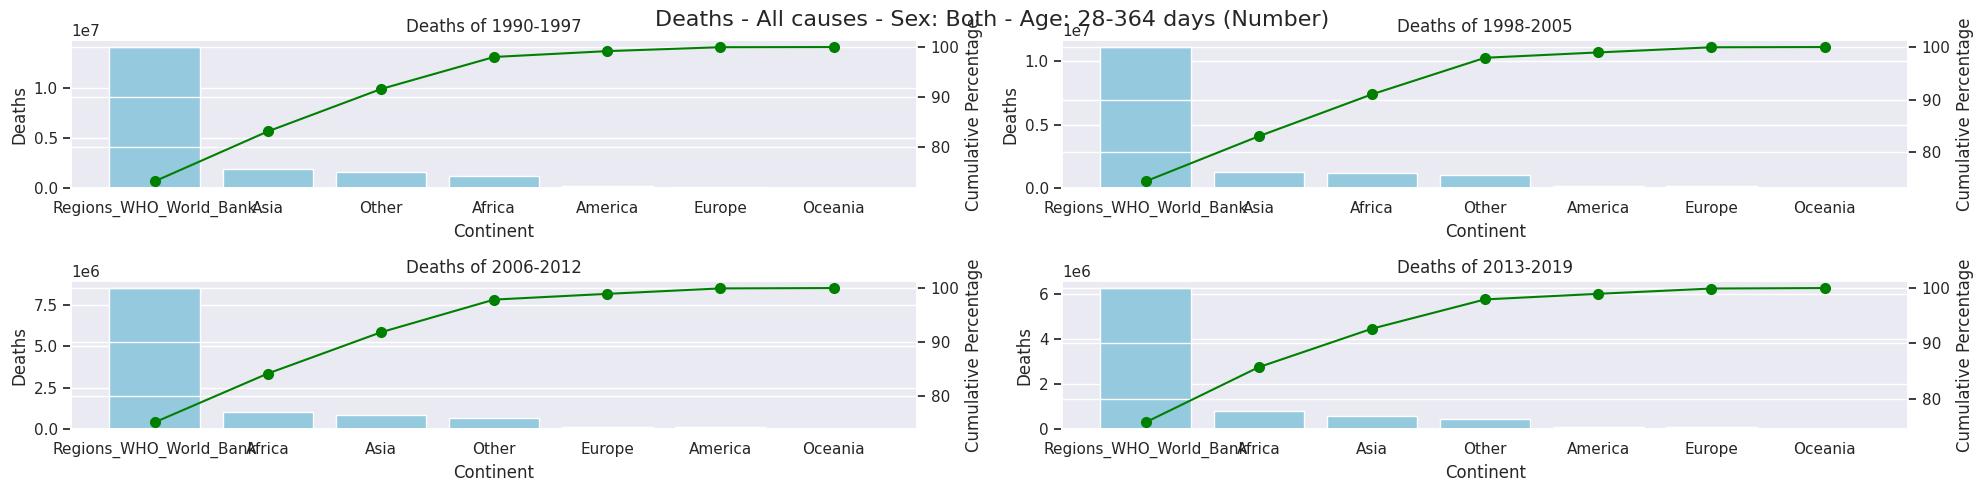

In [27]:
Paretto_diagram('Deaths - All causes - Sex: Both - Age: 28-364 days (Number)')

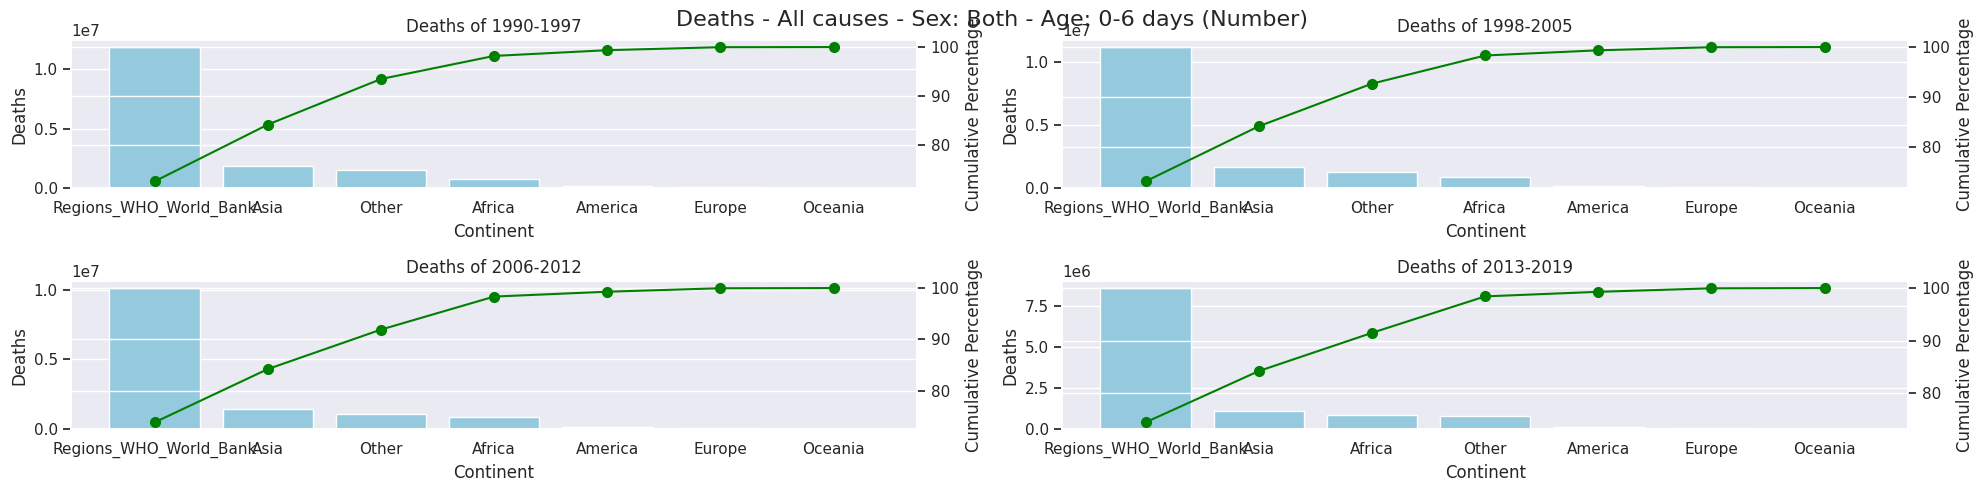

In [28]:
Paretto_diagram('Deaths - All causes - Sex: Both - Age: 0-6 days (Number)')

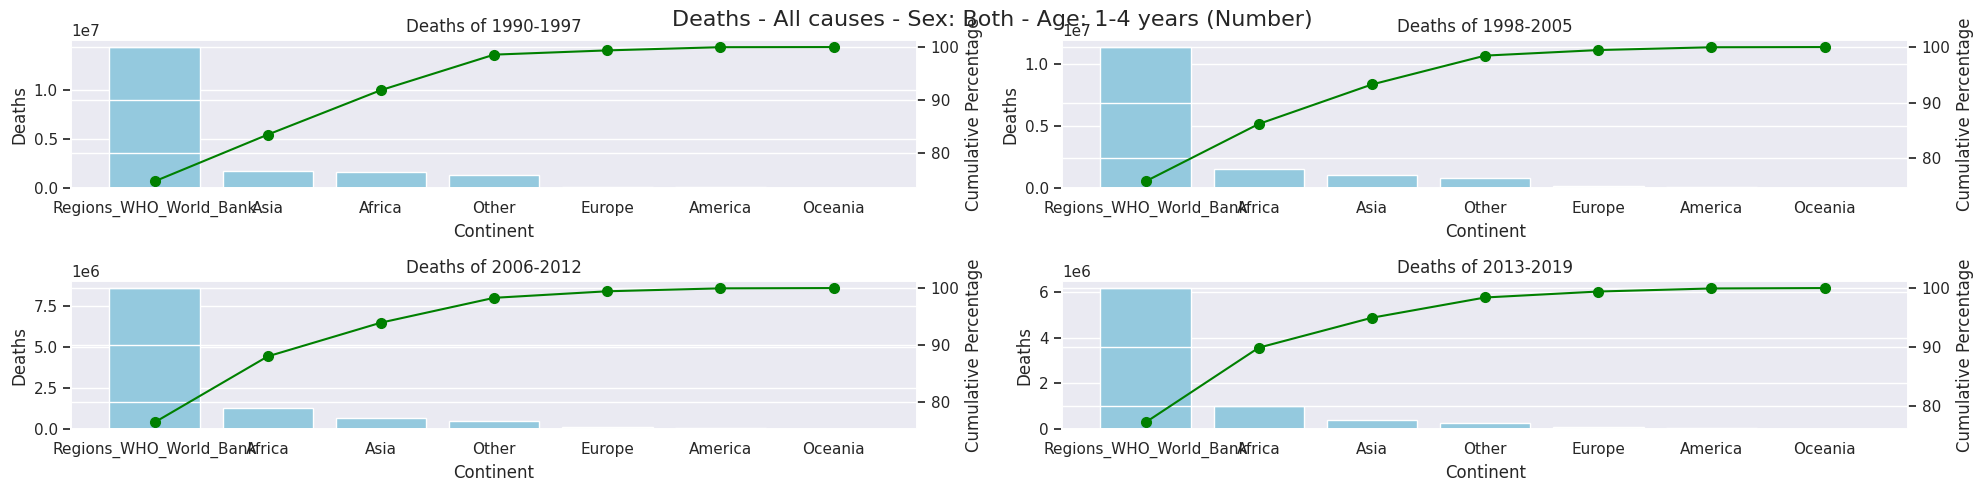

In [29]:
Paretto_diagram('Deaths - All causes - Sex: Both - Age: 1-4 years (Number)')

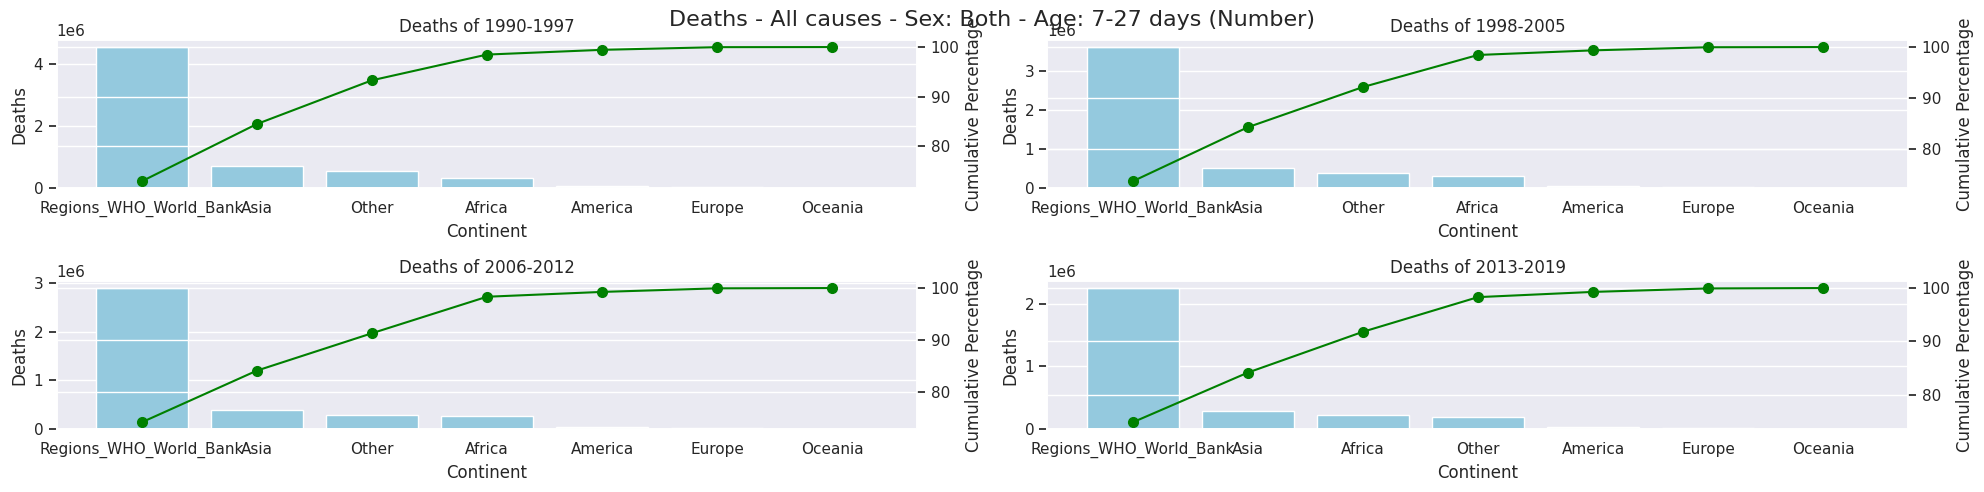

In [30]:
Paretto_diagram('Deaths - All causes - Sex: Both - Age: 7-27 days (Number)')

#### Countries with the highest number of deaths

In [31]:
def countries_with_highest_deaths(by, top=10, figsize=(25,10)):
    index_delete = mean_deaths_by_epoch.Continent.loc[
    (mean_deaths_by_epoch['Continent'] == 'Regions_WHO_World_Bank') |
    (mean_deaths_by_epoch['Continent'] == 'Other')
    ].index
    data_sorted = mean_deaths_by_epoch.drop(index_delete, axis=0)
    data_sorted = data_sorted.sort_values(by=by, ascending=False)
    data_sorted = data_sorted.head(top)

    fig, axes = plt.subplots(2,2, figsize=figsize)

    for epoch, ax in zip(Epochs, axes.flatten()):
        data_epoch = data_sorted.loc[data_sorted['Epoch'] == epoch]
        try:
            sns.barplot(data=data_epoch, x='Entity', y=by, ax=ax)
        except:
            print("Cannot display the graph. Increase the number of Top. Default number is 10")
        
        ax.set_ylabel('Deaths')
        ax.set_title('Deaths of {}'.format(epoch))
    fig.subplots_adjust(hspace=1)
    plt.tight_layout()

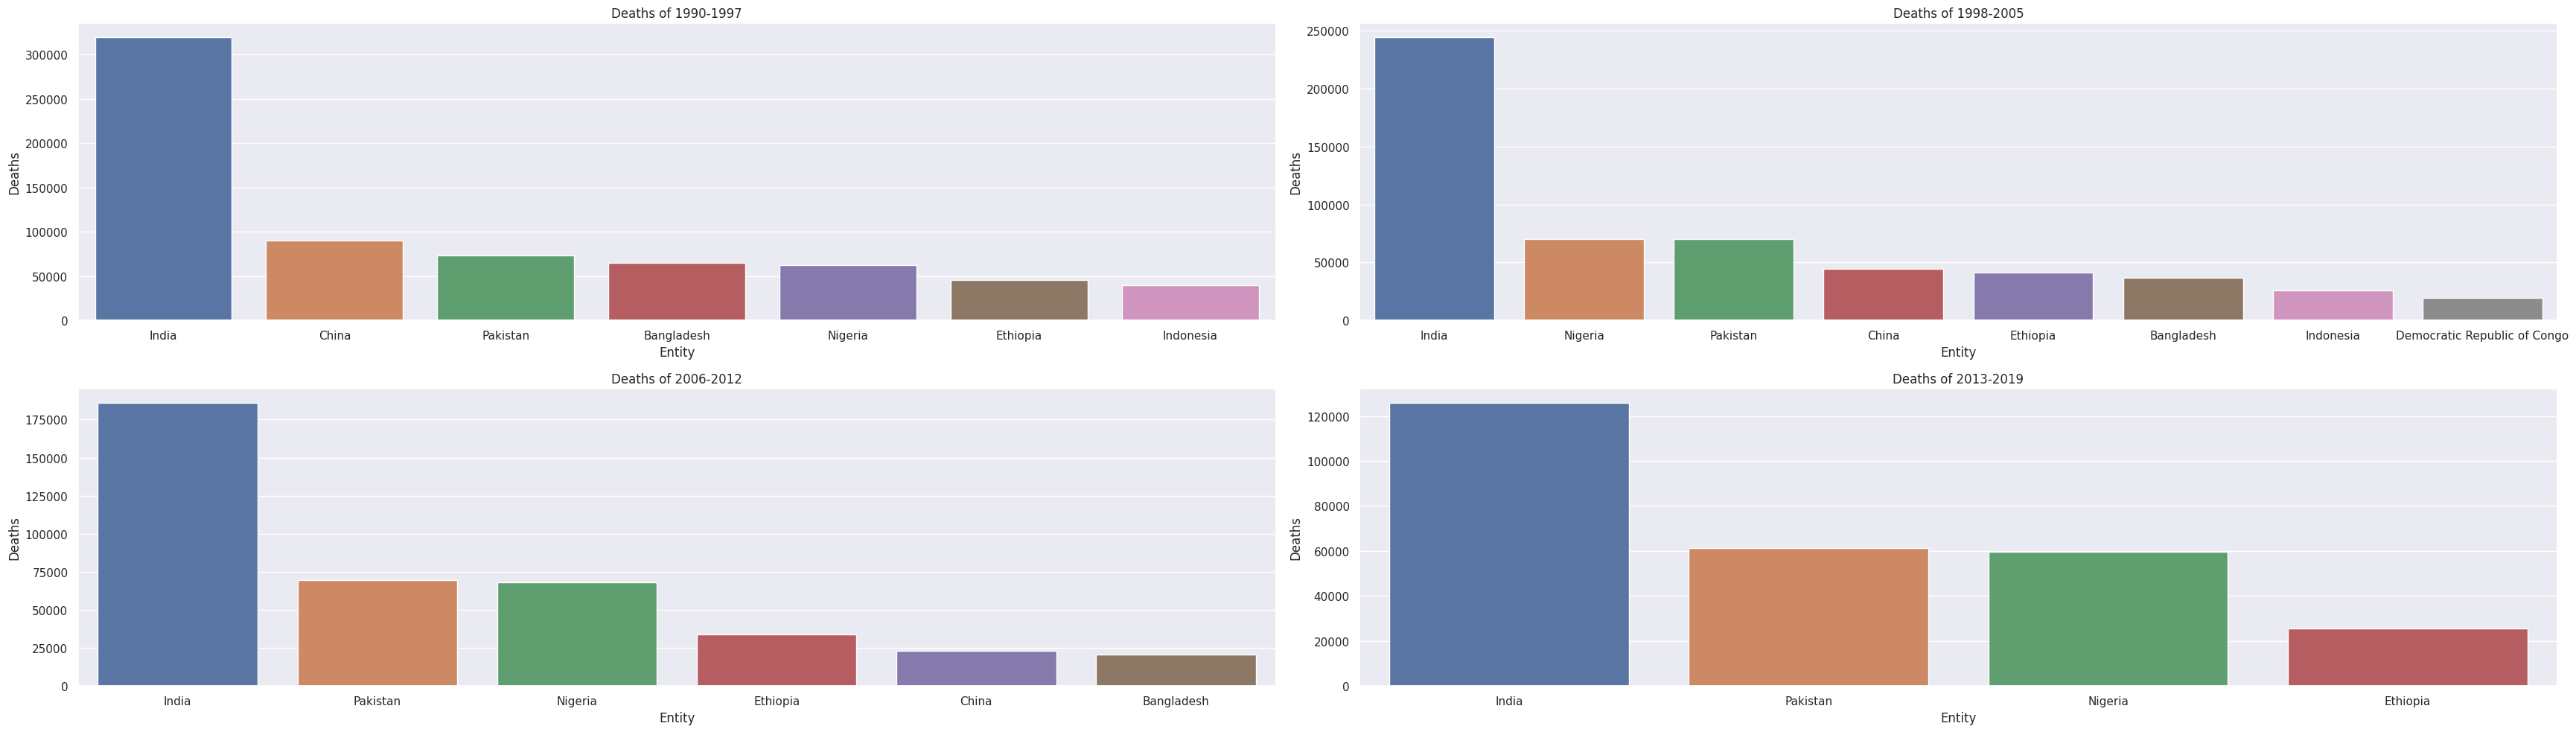

In [32]:
countries_with_highest_deaths(by='Deaths - All causes - Sex: Both - Age: 7-27 days (Number)', top=25, figsize=(35,10))

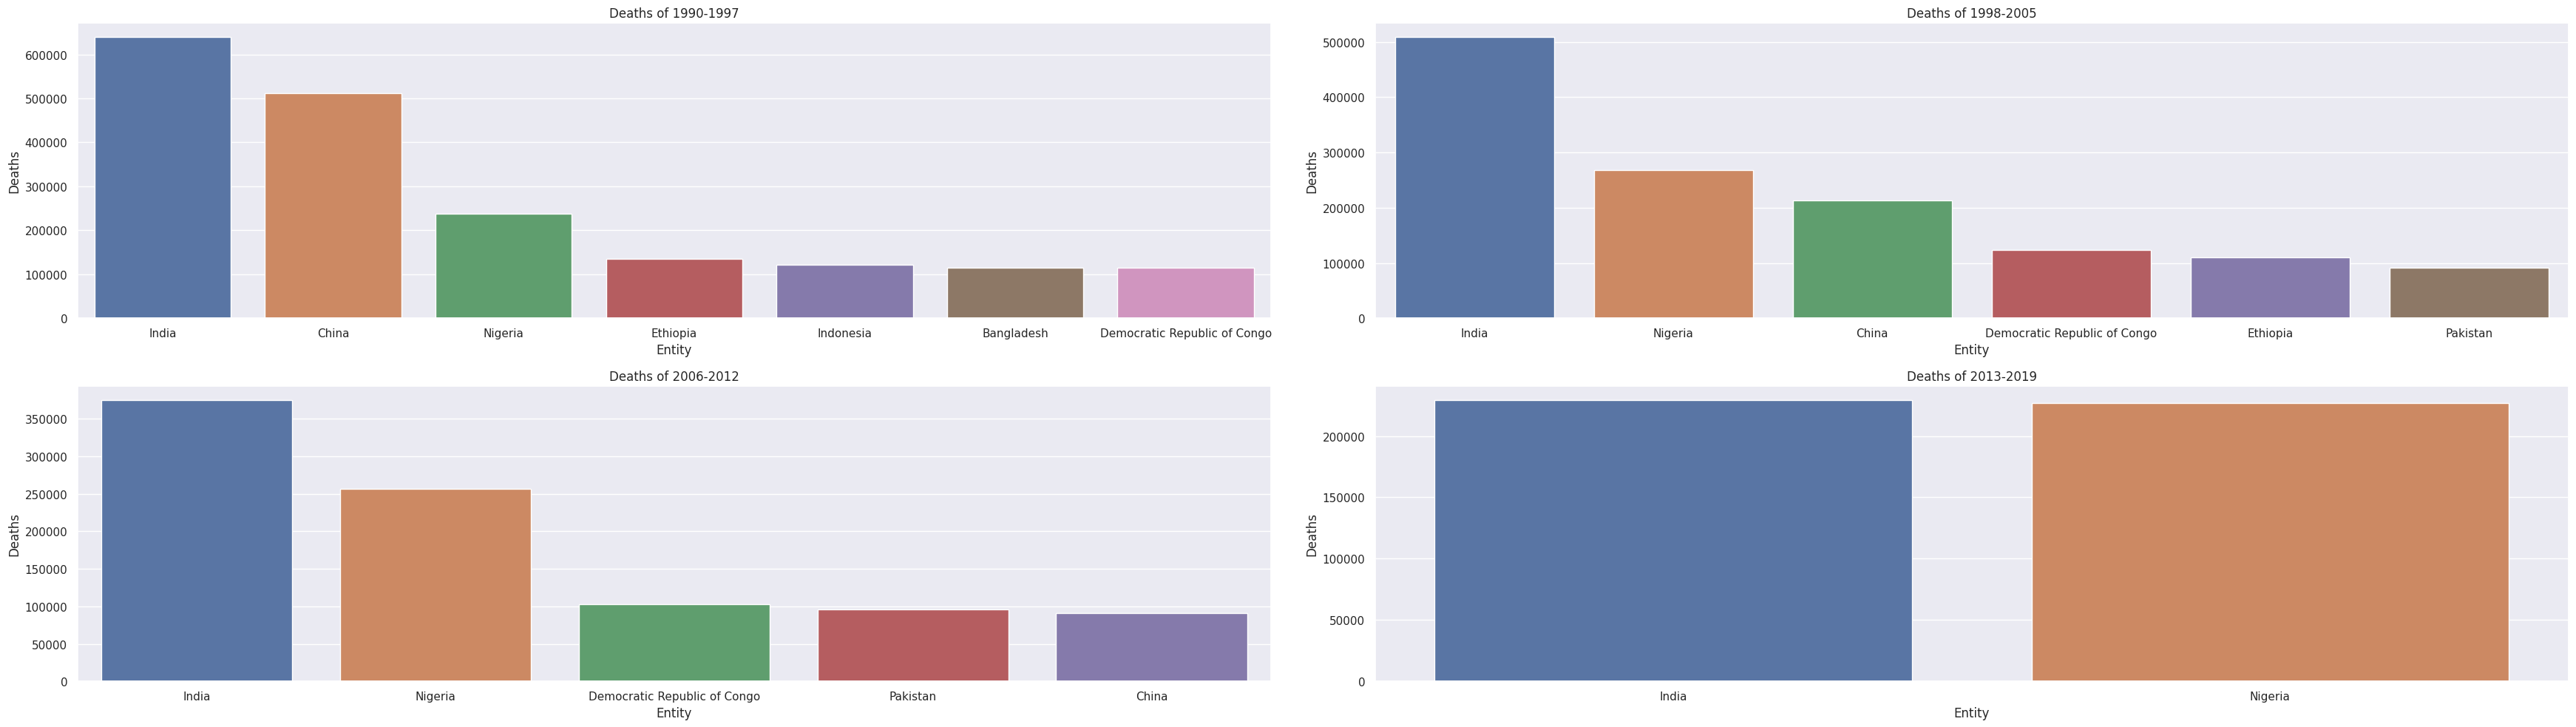

In [33]:
countries_with_highest_deaths(by='Deaths - All causes - Sex: Both - Age: 28-364 days (Number)', top=20, figsize=(35,10))

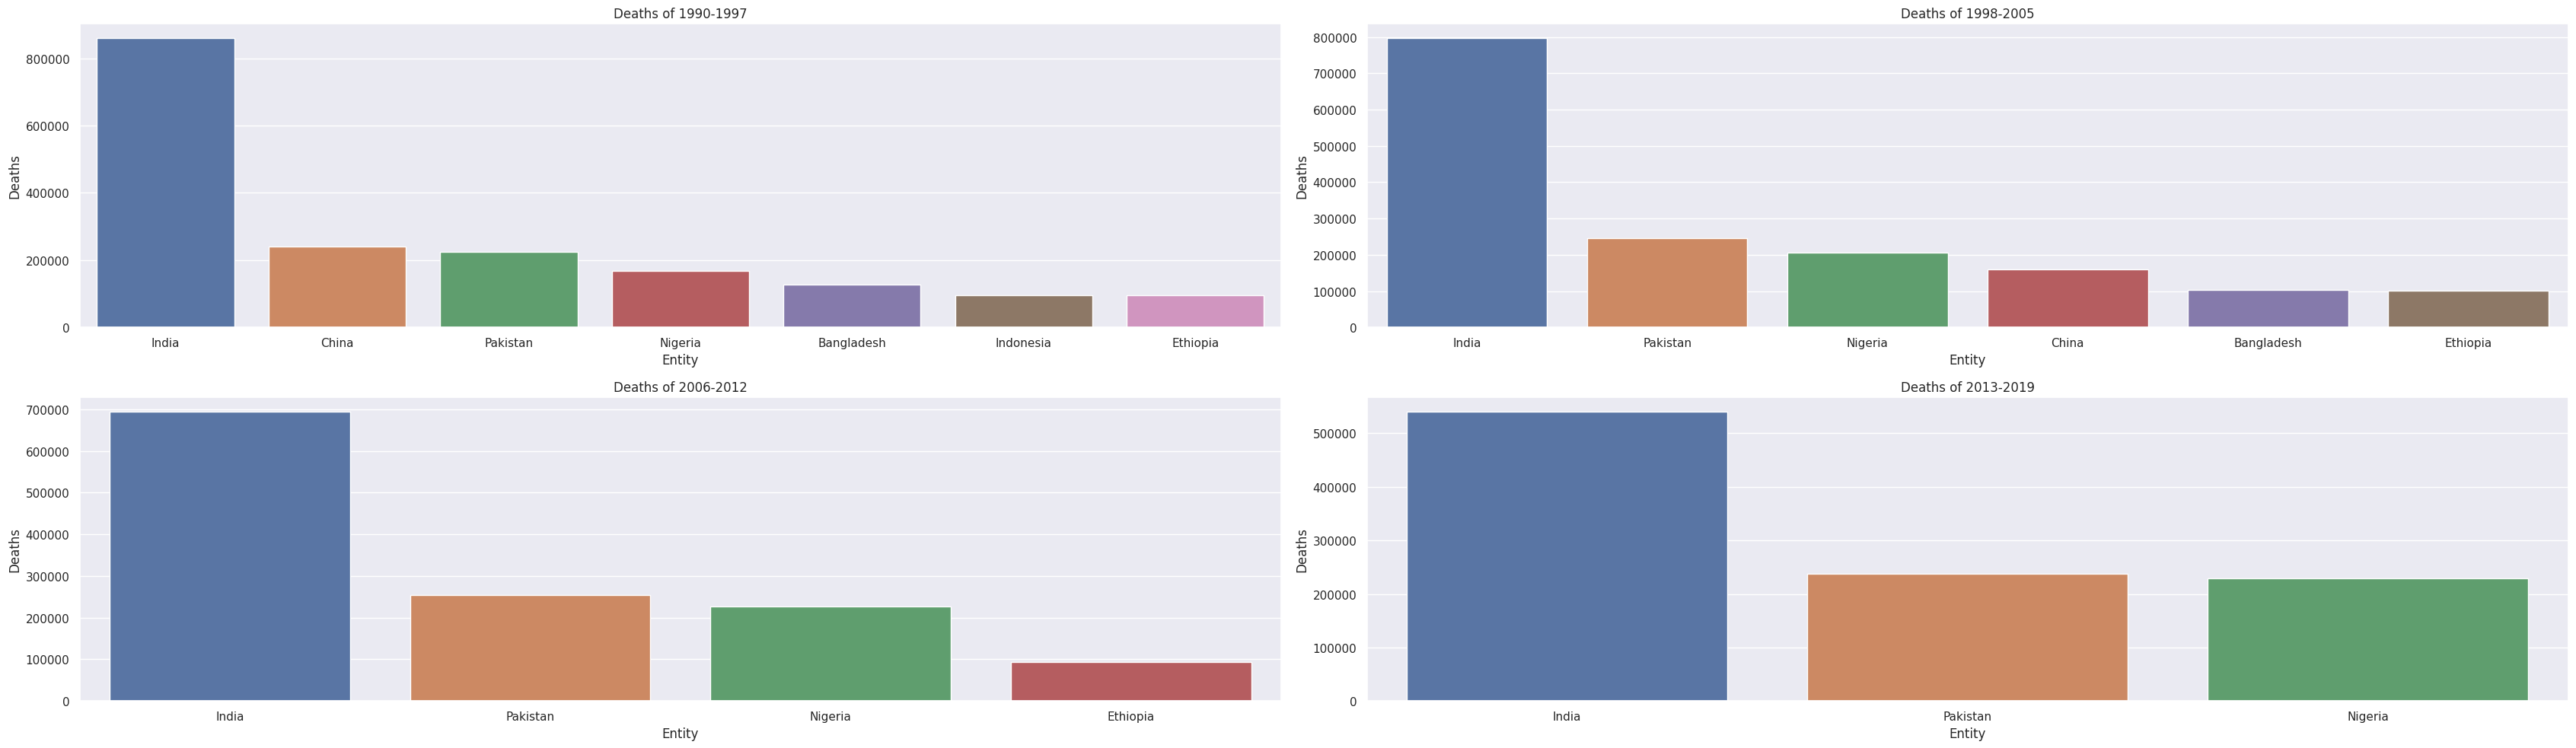

In [34]:
countries_with_highest_deaths(by='Deaths - All causes - Sex: Both - Age: 0-6 days (Number)', top=20, figsize=(34,10))

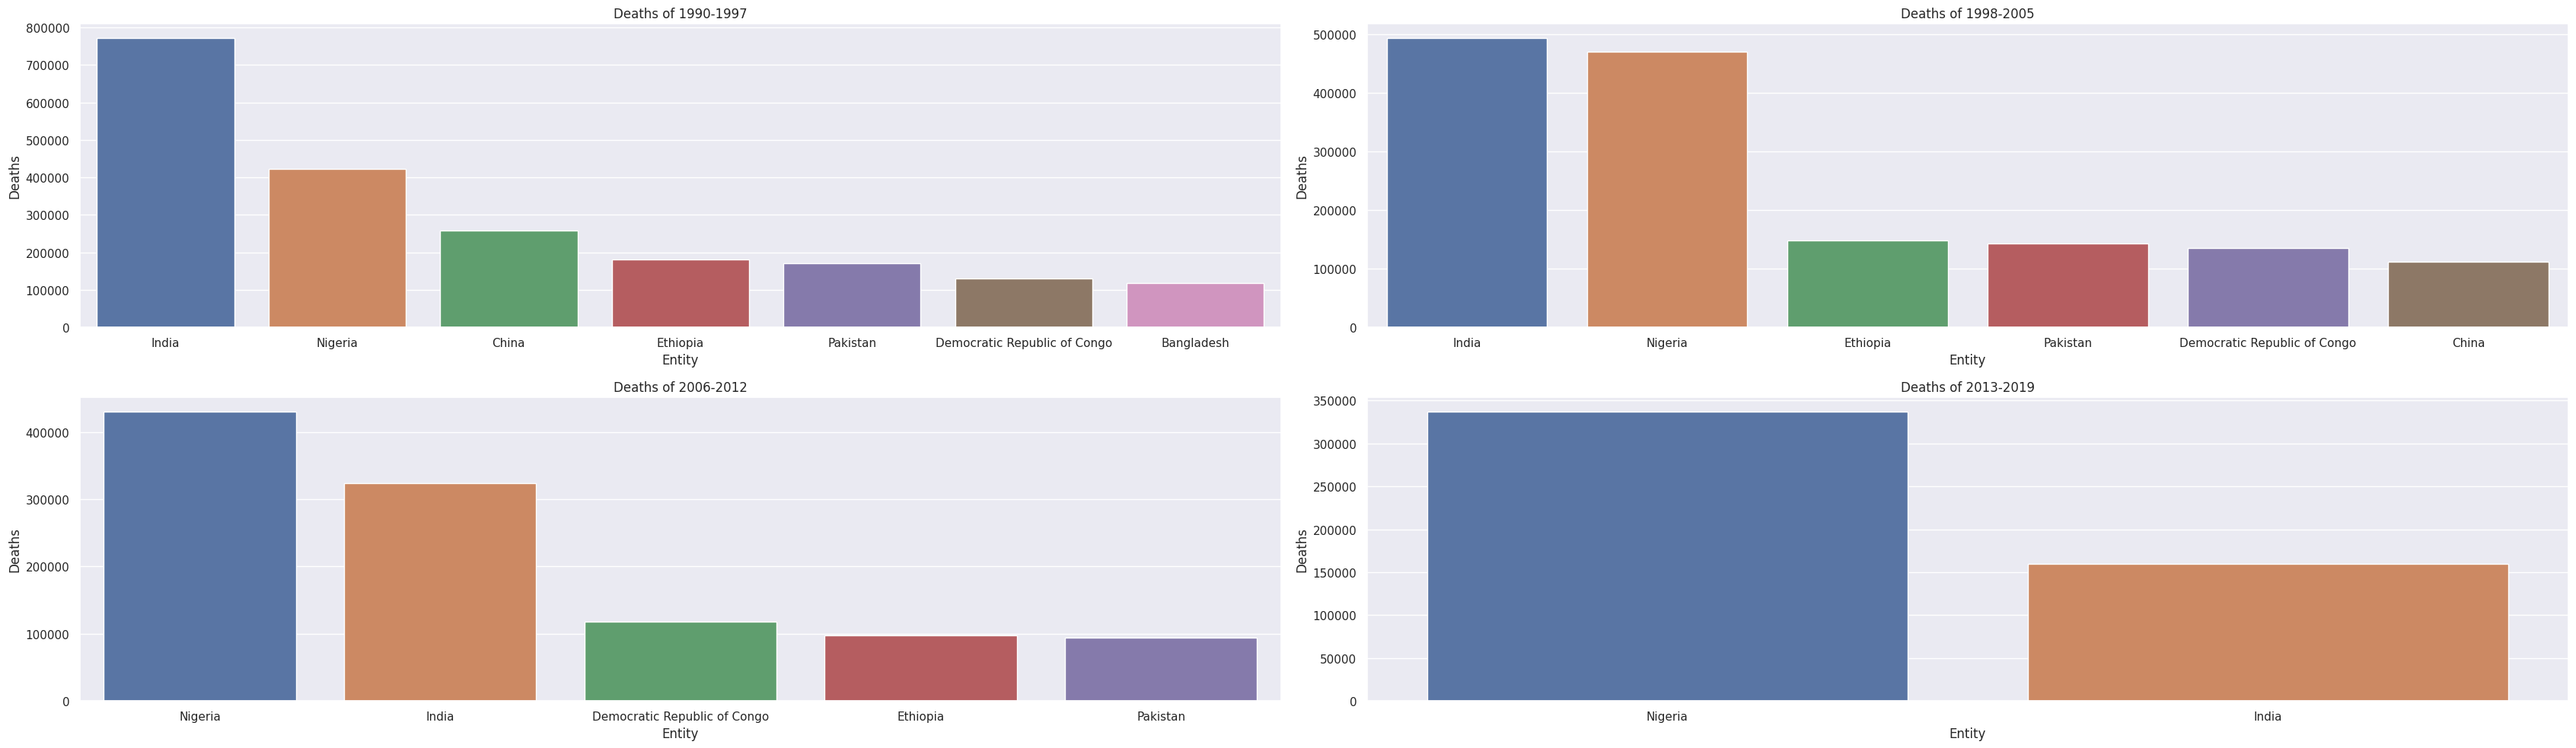

In [35]:
countries_with_highest_deaths(by='Deaths - All causes - Sex: Both - Age: 1-4 years (Number)', top=20, figsize=(34,10))

#### Deaths Causes per Continent

In [36]:
Deaths_causes_columns = ['Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Meningitis - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)']

In [52]:
def plot_causes_by_continent(cause, top=10, figsize = (25,10), all_continents = True):
    data_sorted = mean_deaths_by_epoch.sort_values(by=cause, ascending=False)
    if not all_continents:
        index_continent_to_delete = data_sorted.Continent.loc[
        (data_sorted['Continent'] == 'Regions_WHO_World_Bank') |
        (data_sorted['Continent'] == 'Other')
        ].index
        data_sorted = data_sorted.drop(index_continent_to_delete, axis=0)
    data_sorted = data_sorted.head(top)

    fig, axes = plt.subplots(2,2, figsize=figsize)

    for epoch, ax in zip(Epochs, axes.flatten()):
        data_epoch = data_sorted.loc[data_sorted['Epoch'] == epoch]
        try:
            sns.barplot(data= data_epoch, x='Continent', y=cause, ax=ax)
        except:
            print('Cannot display the graph. Increase the number of Top. Default number is 10')
        ax.set_ylabel('Deaths')
        ax.set_title(f'Deaths of {epoch}')
    fig.subplots_adjust(hspace=1)
    fig.suptitle(cause)
    plt.tight_layout()

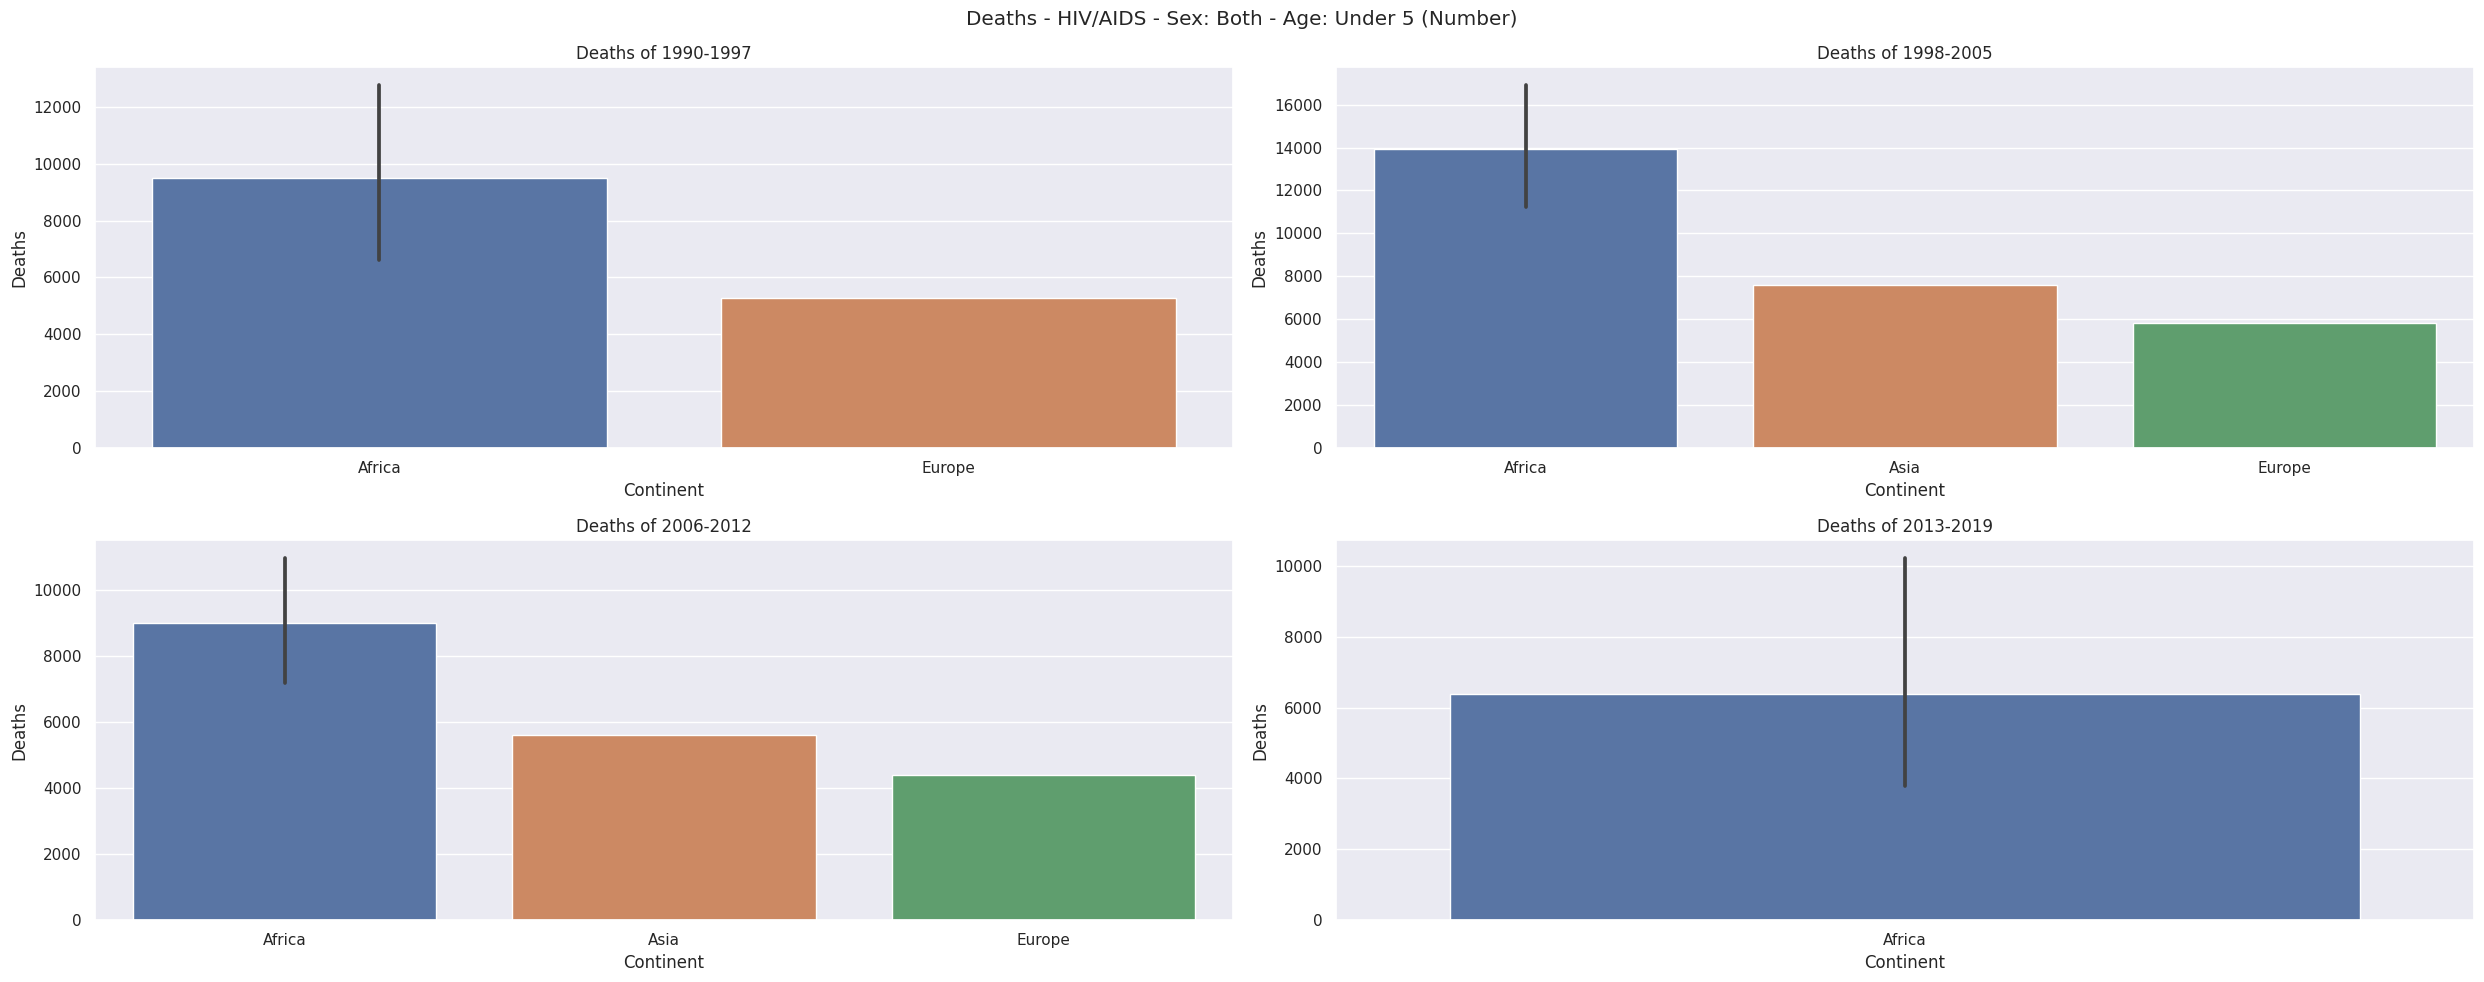

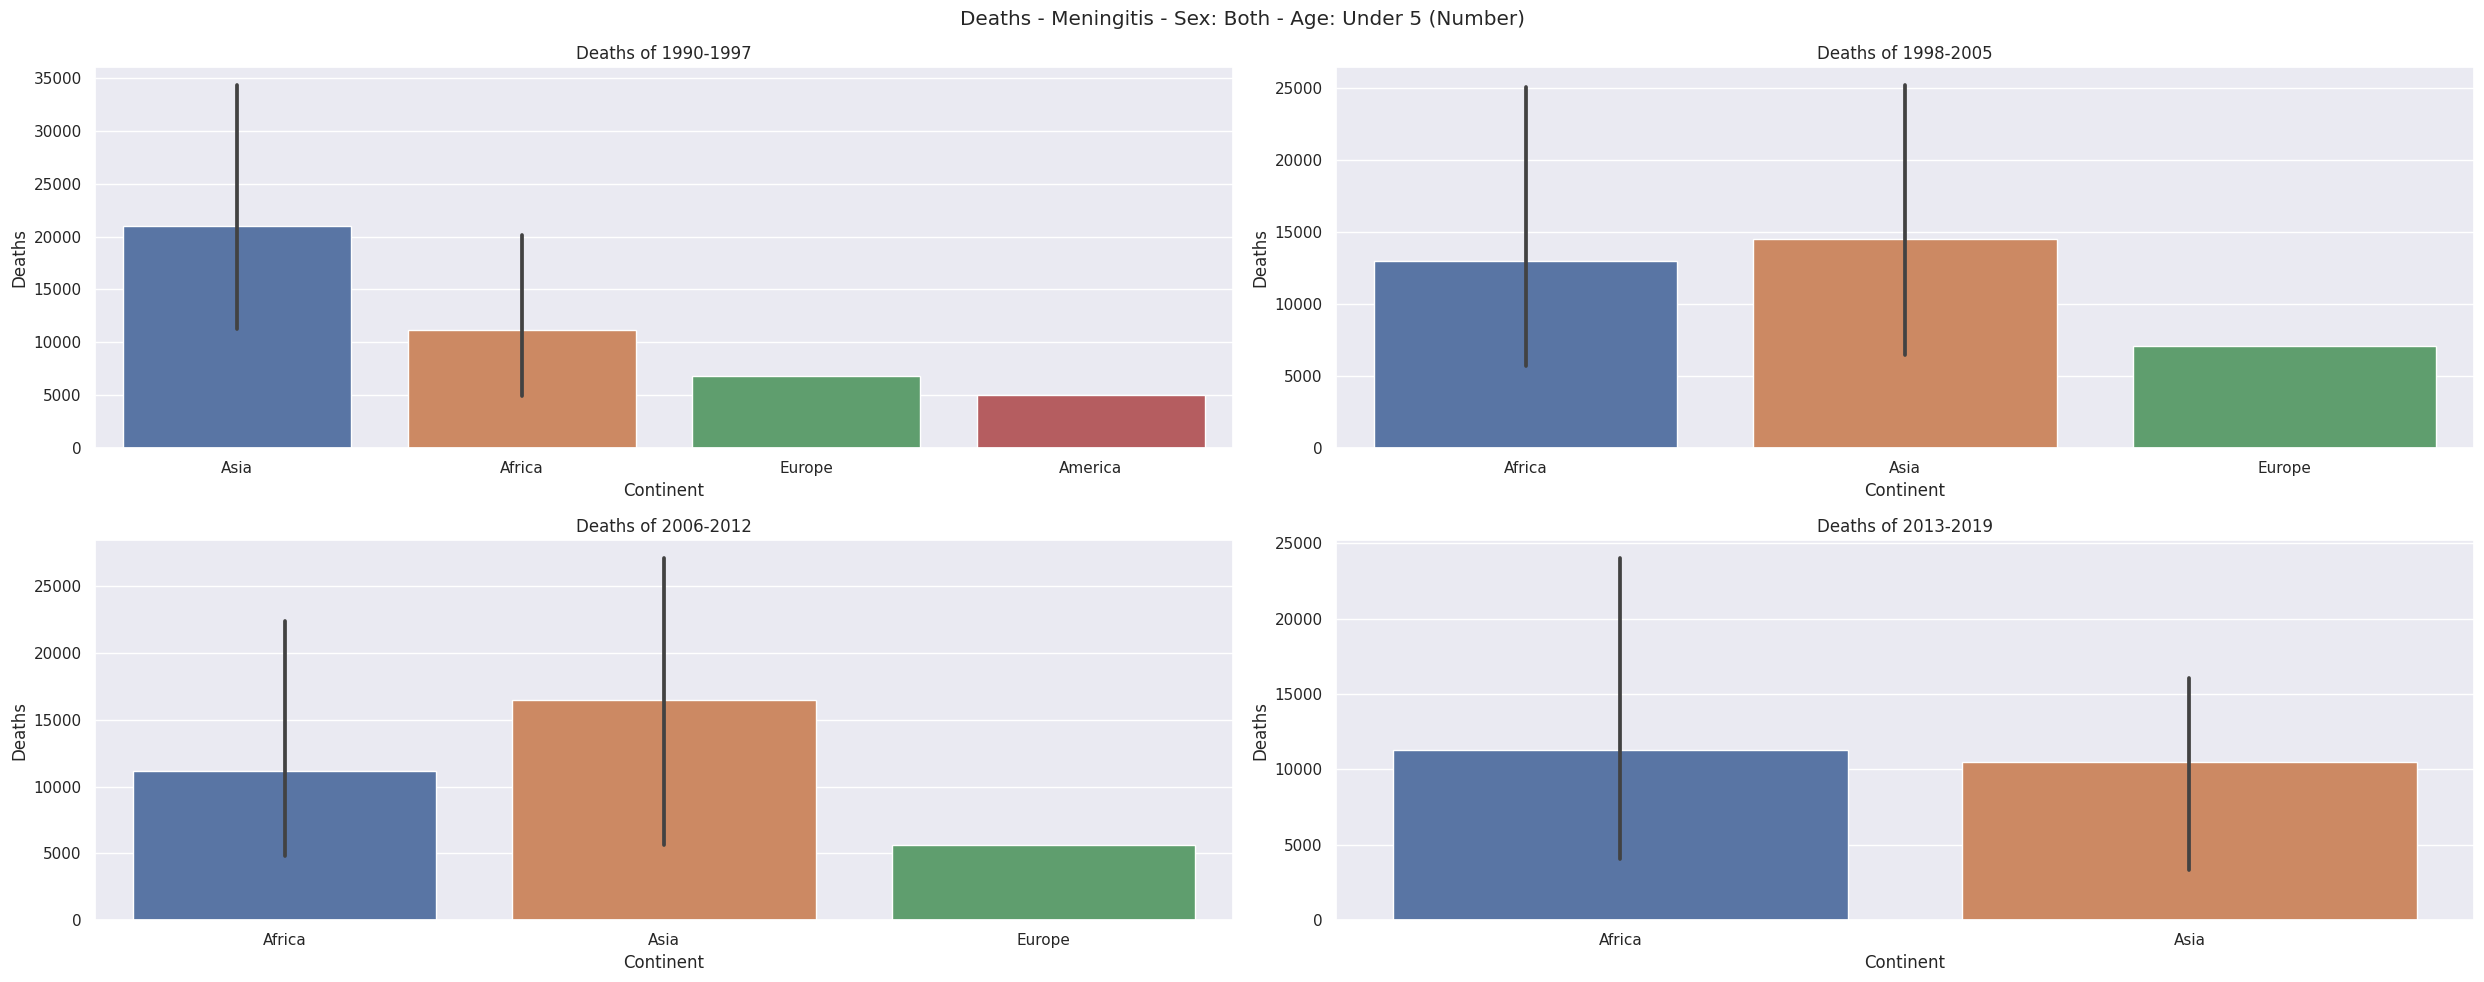

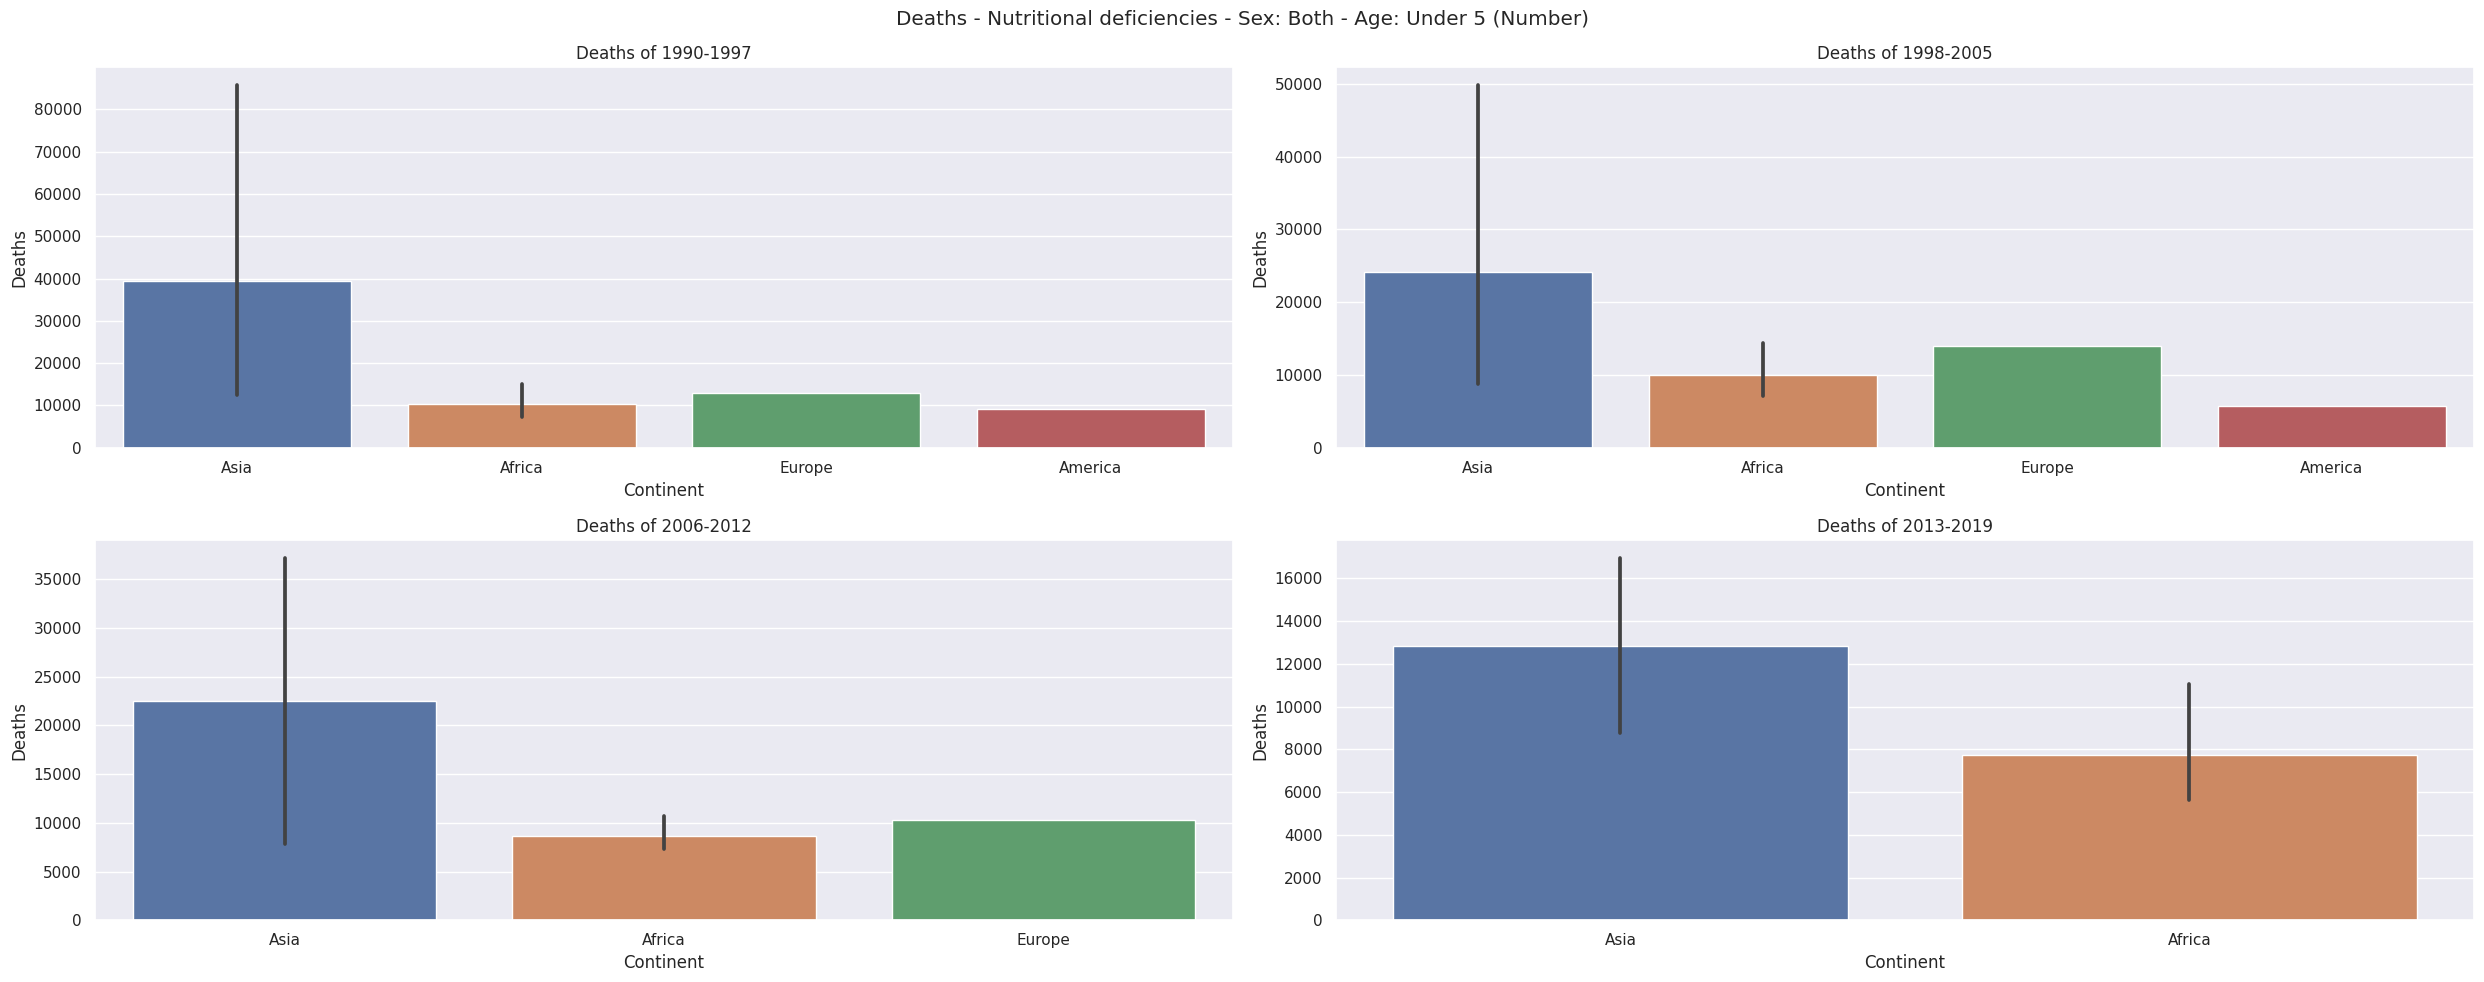

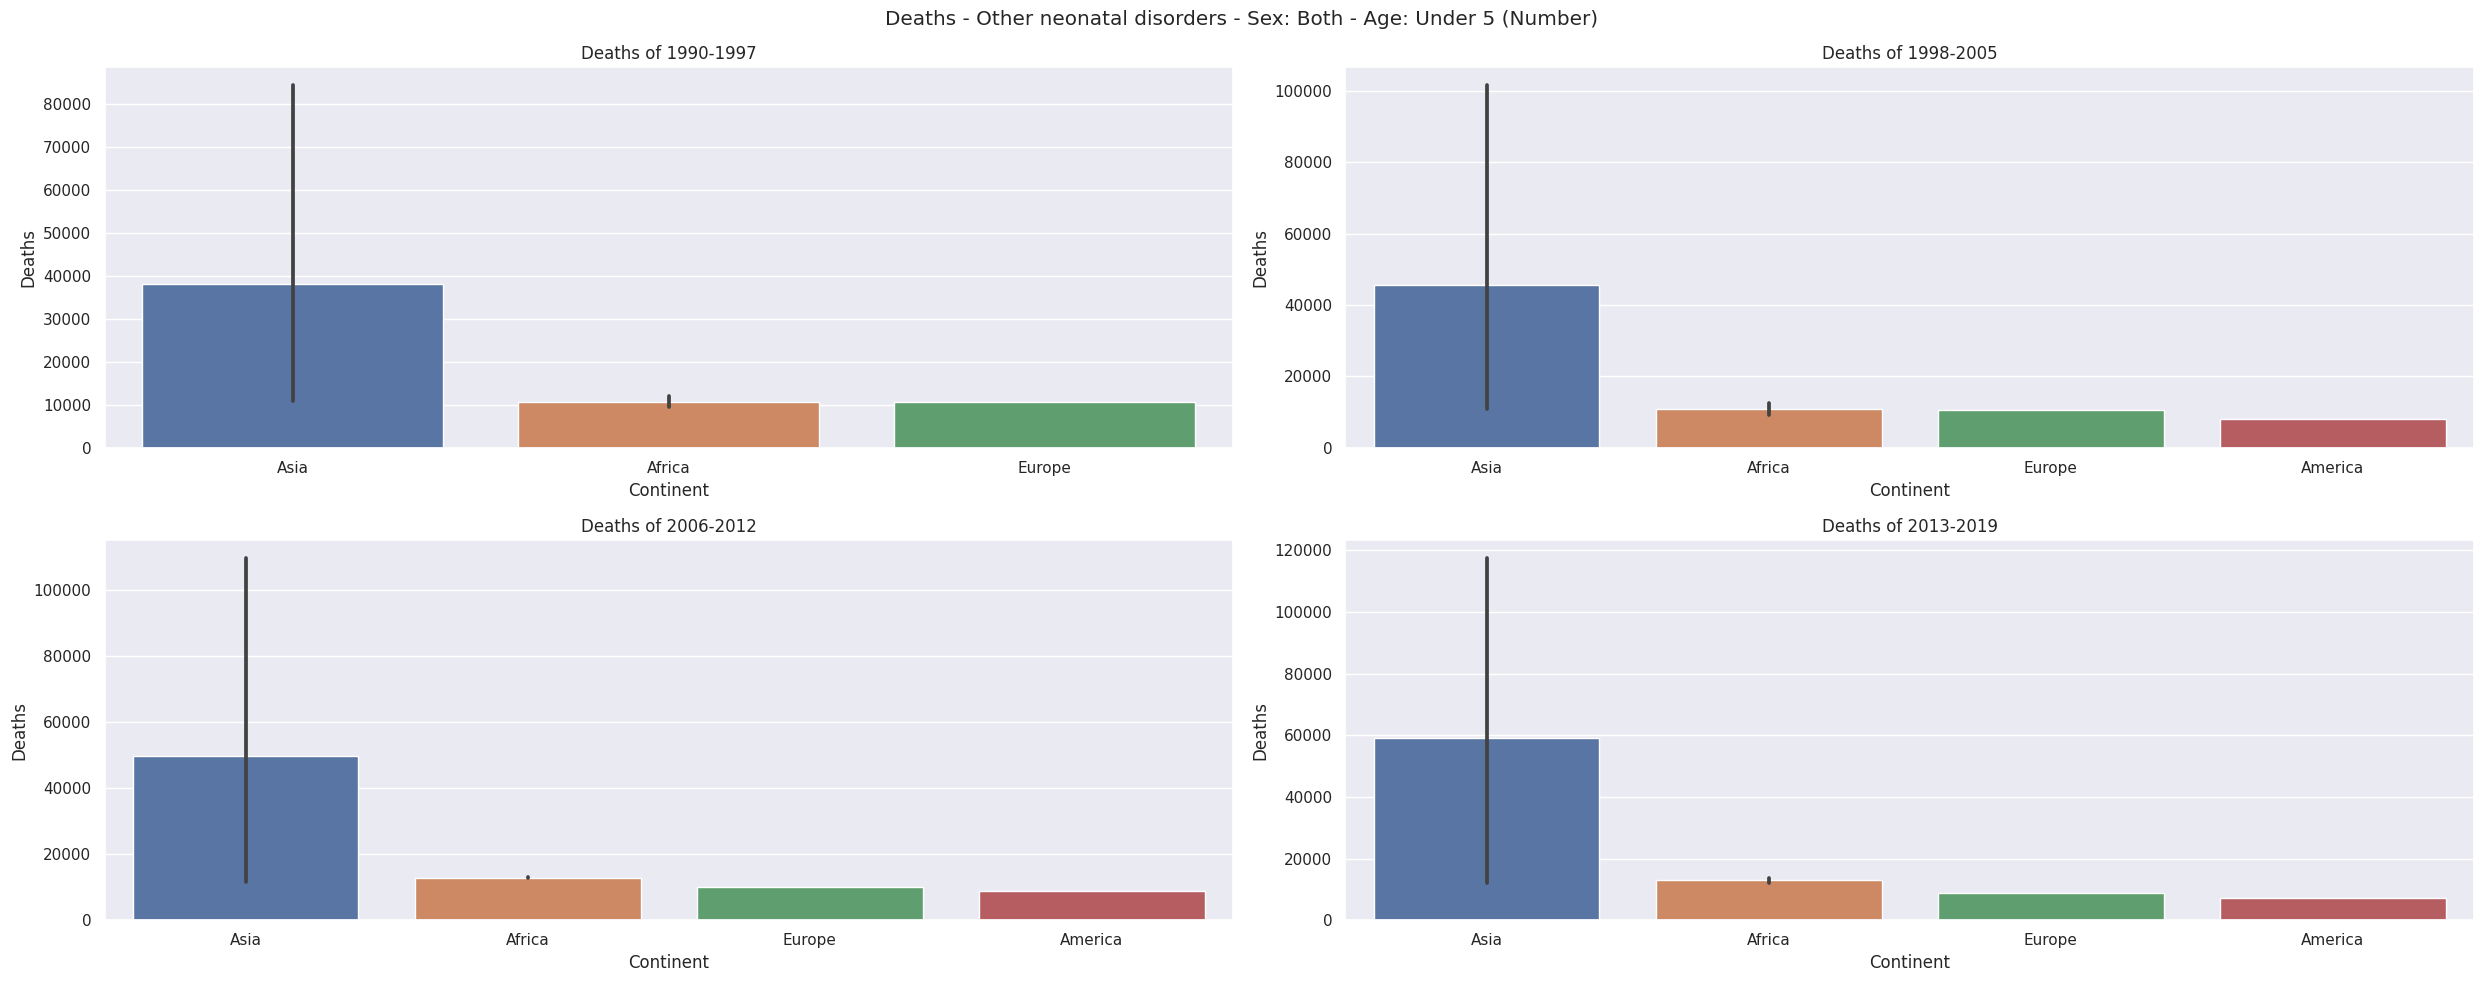

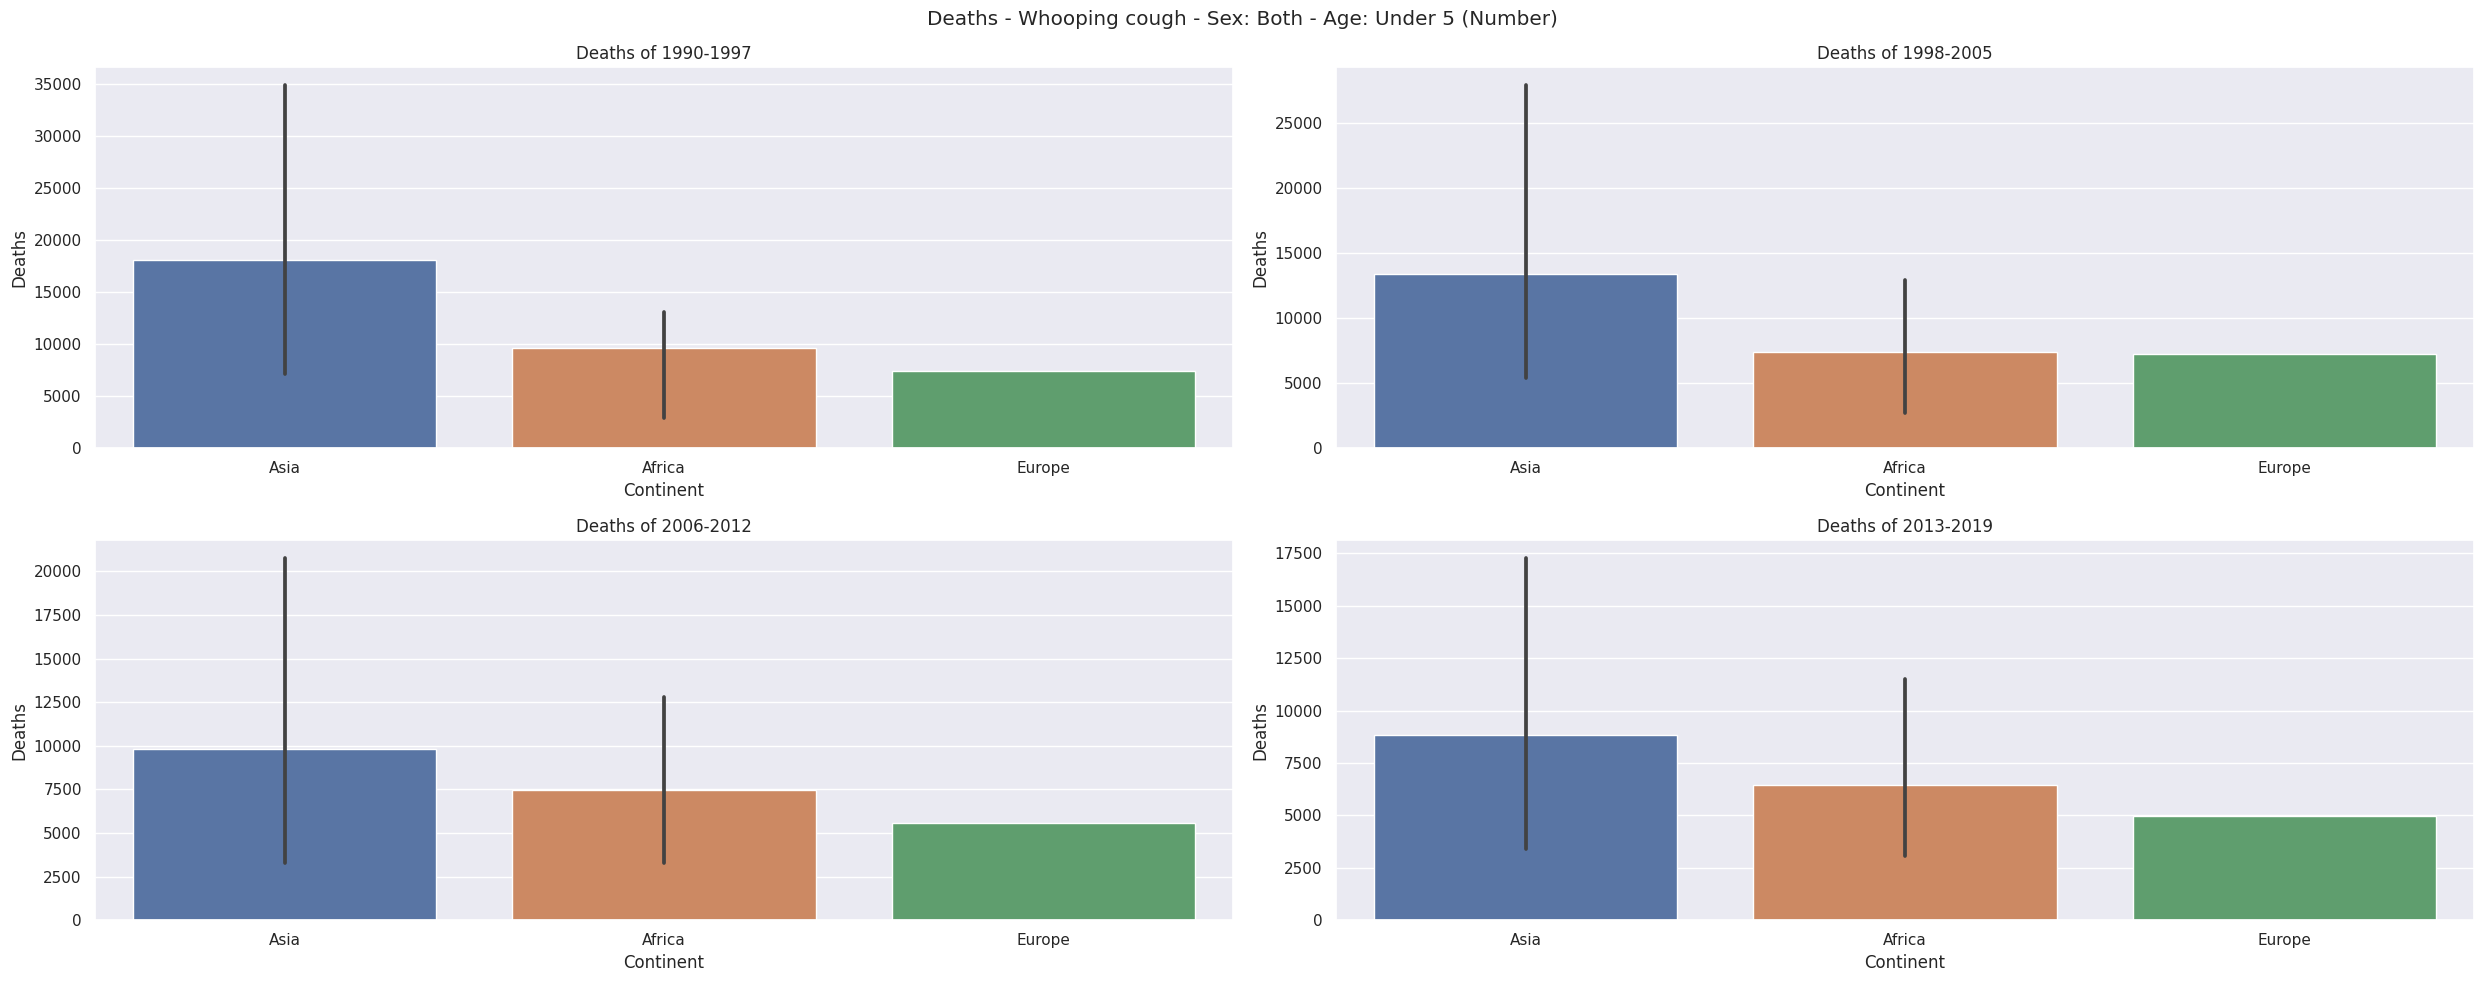

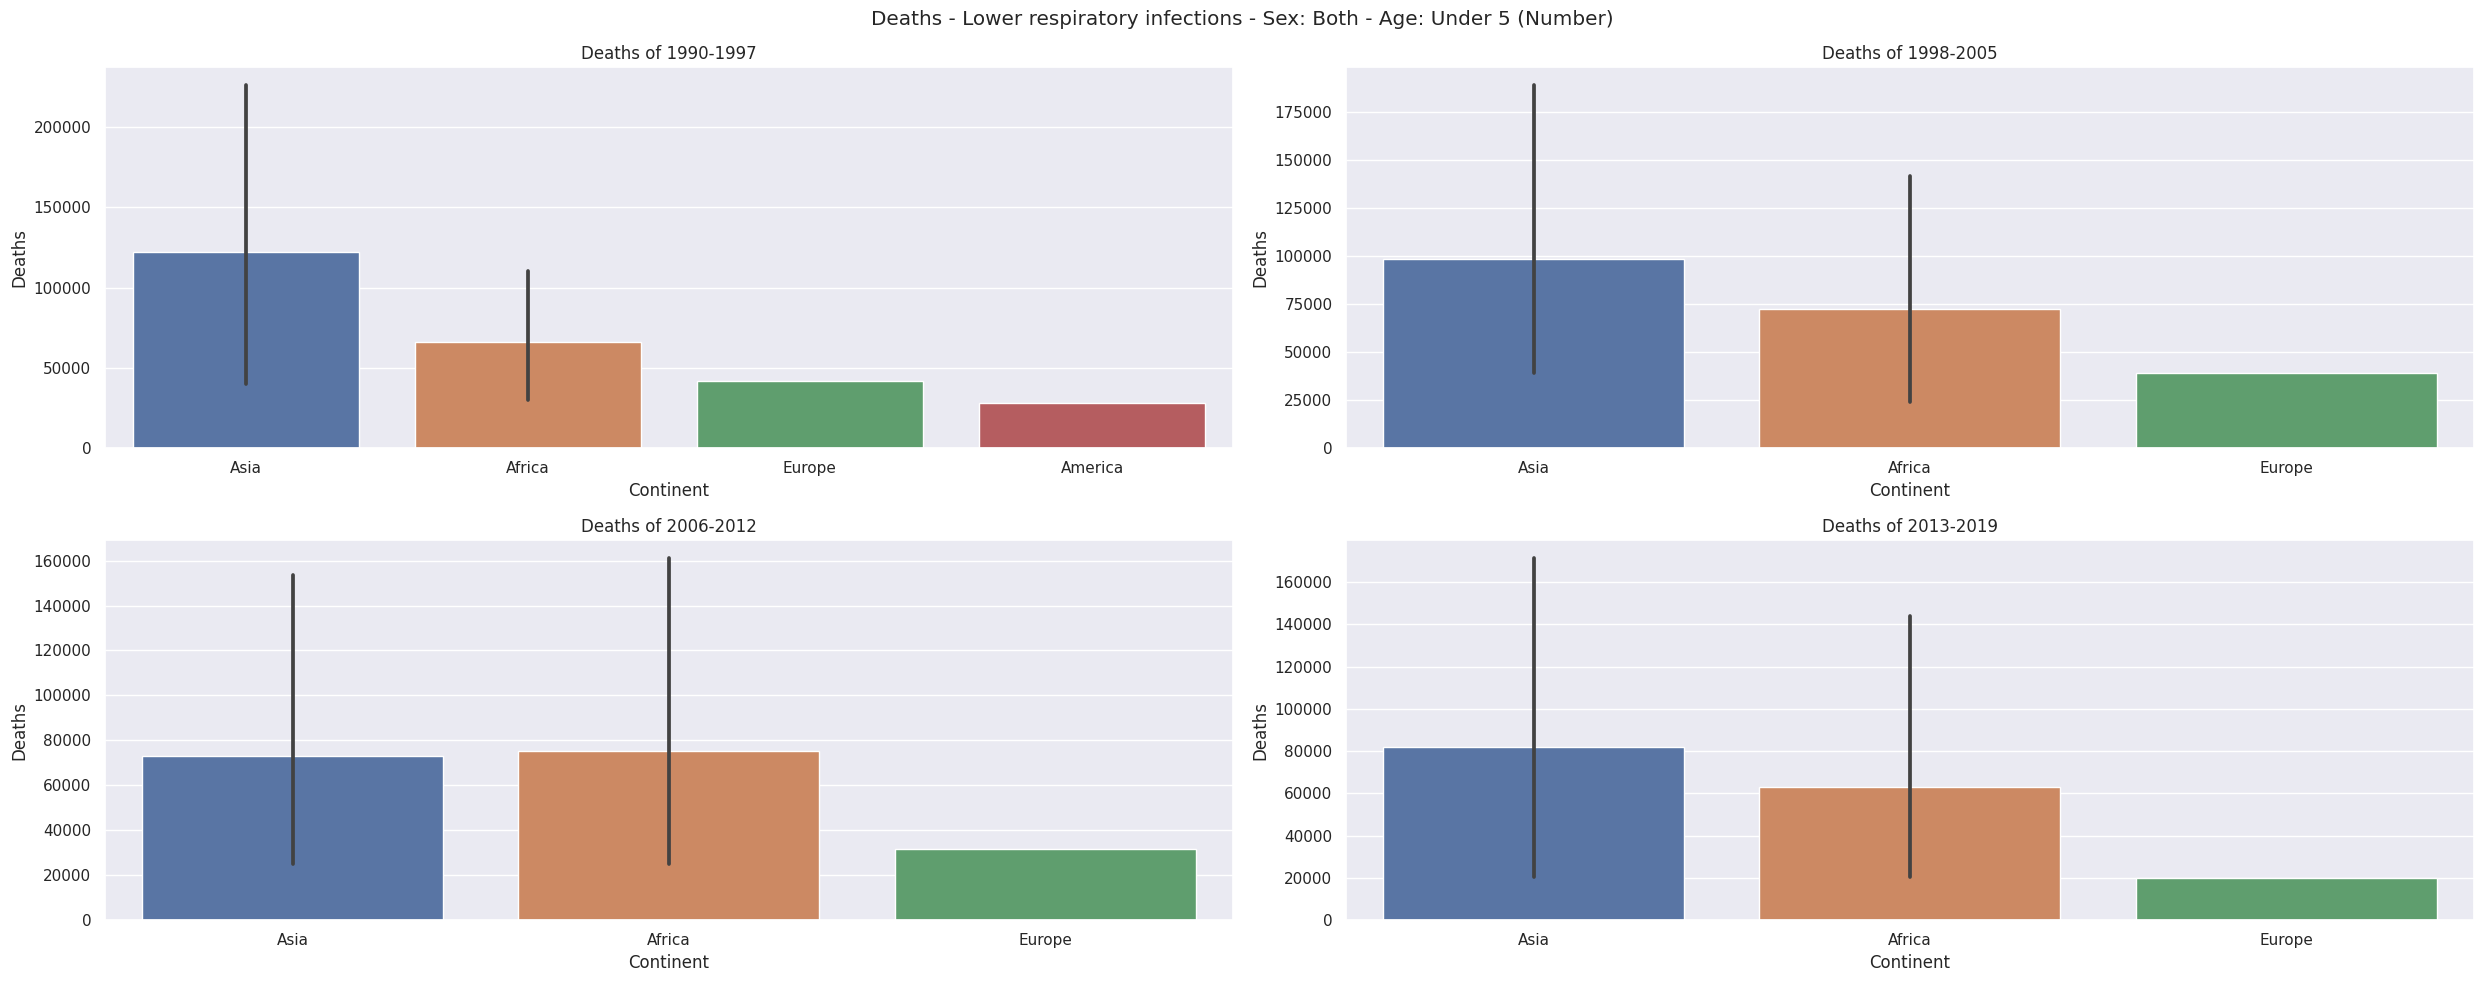

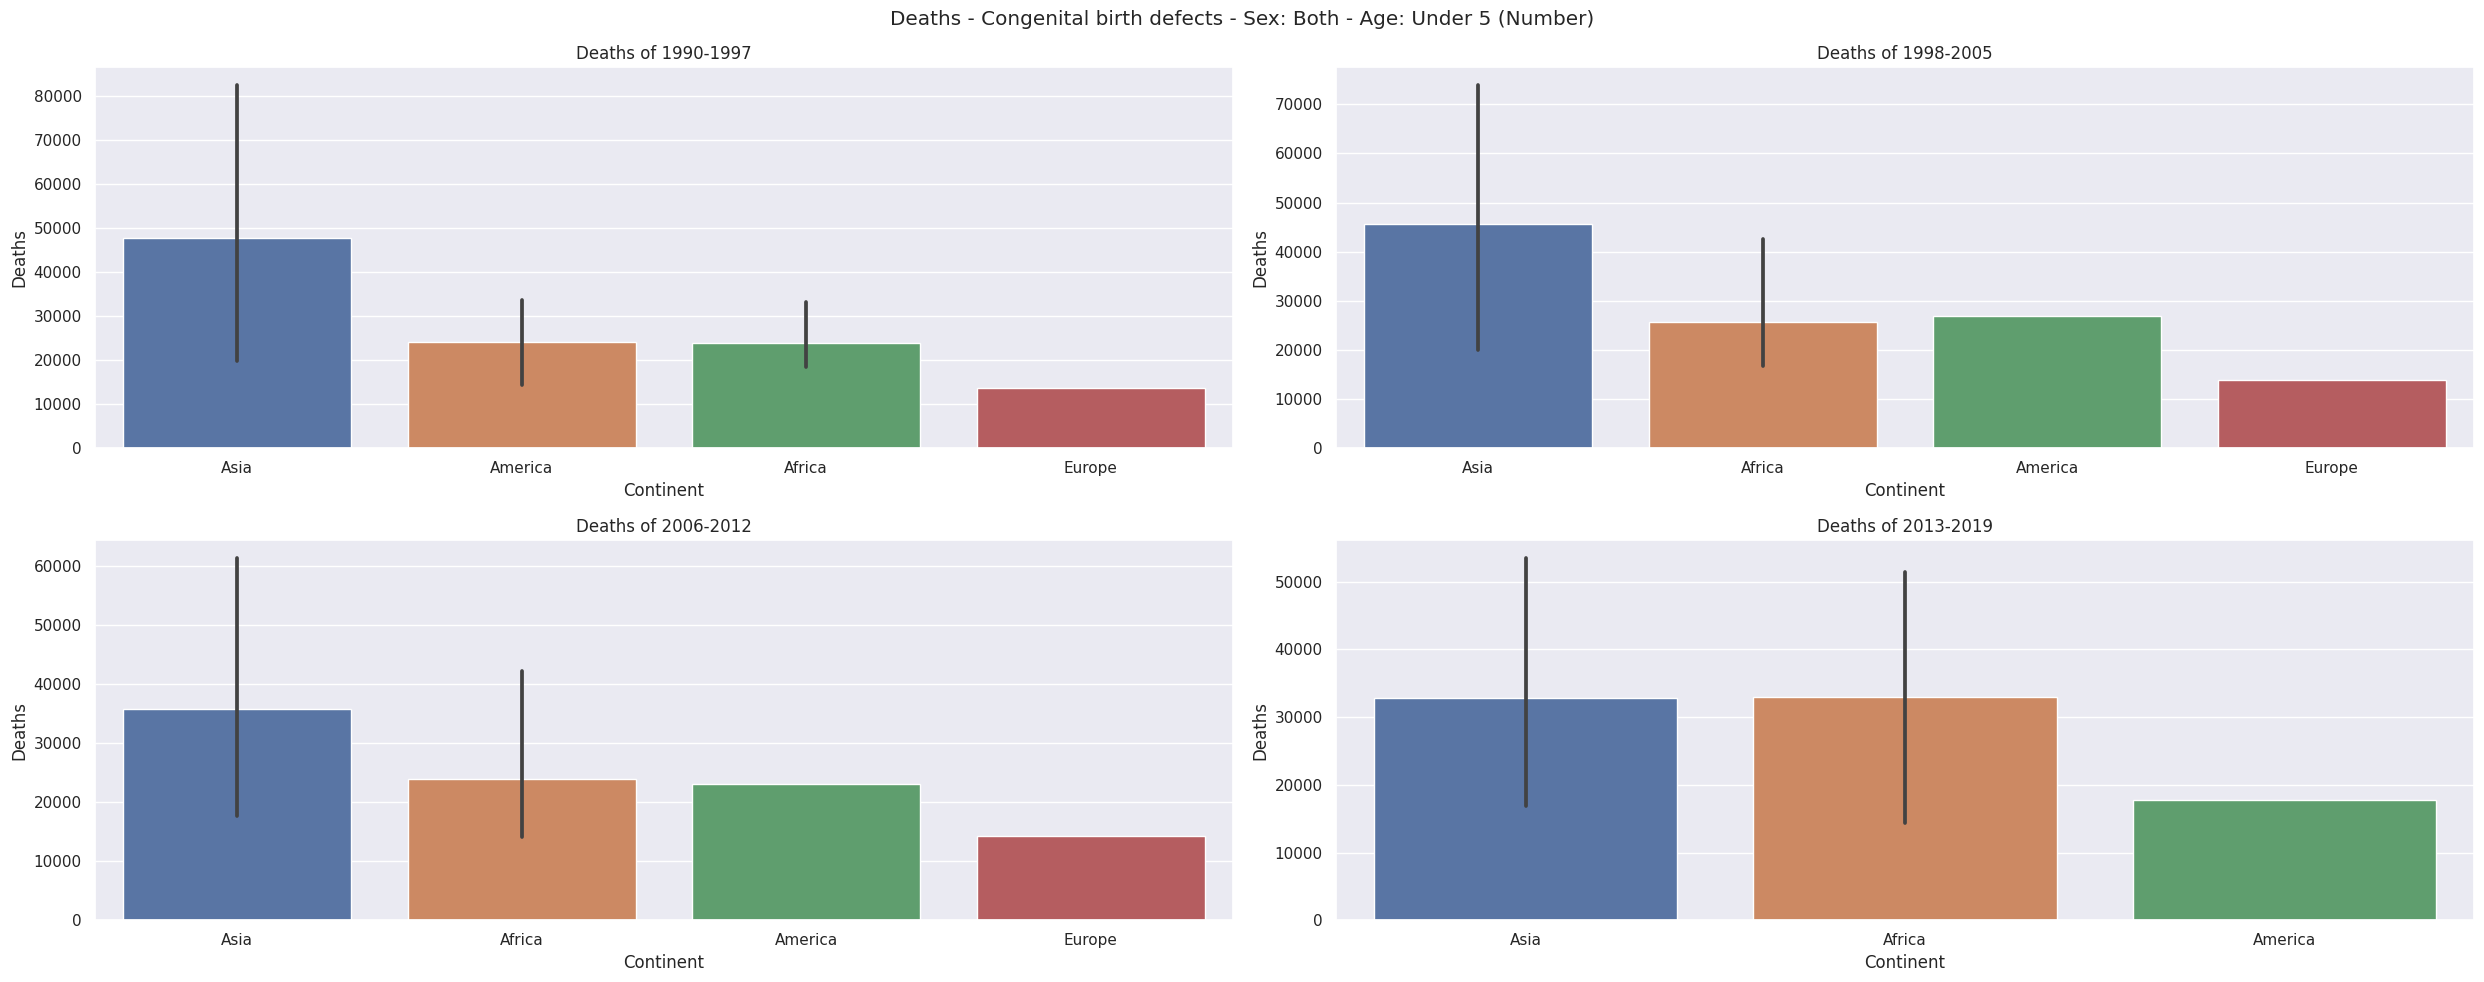

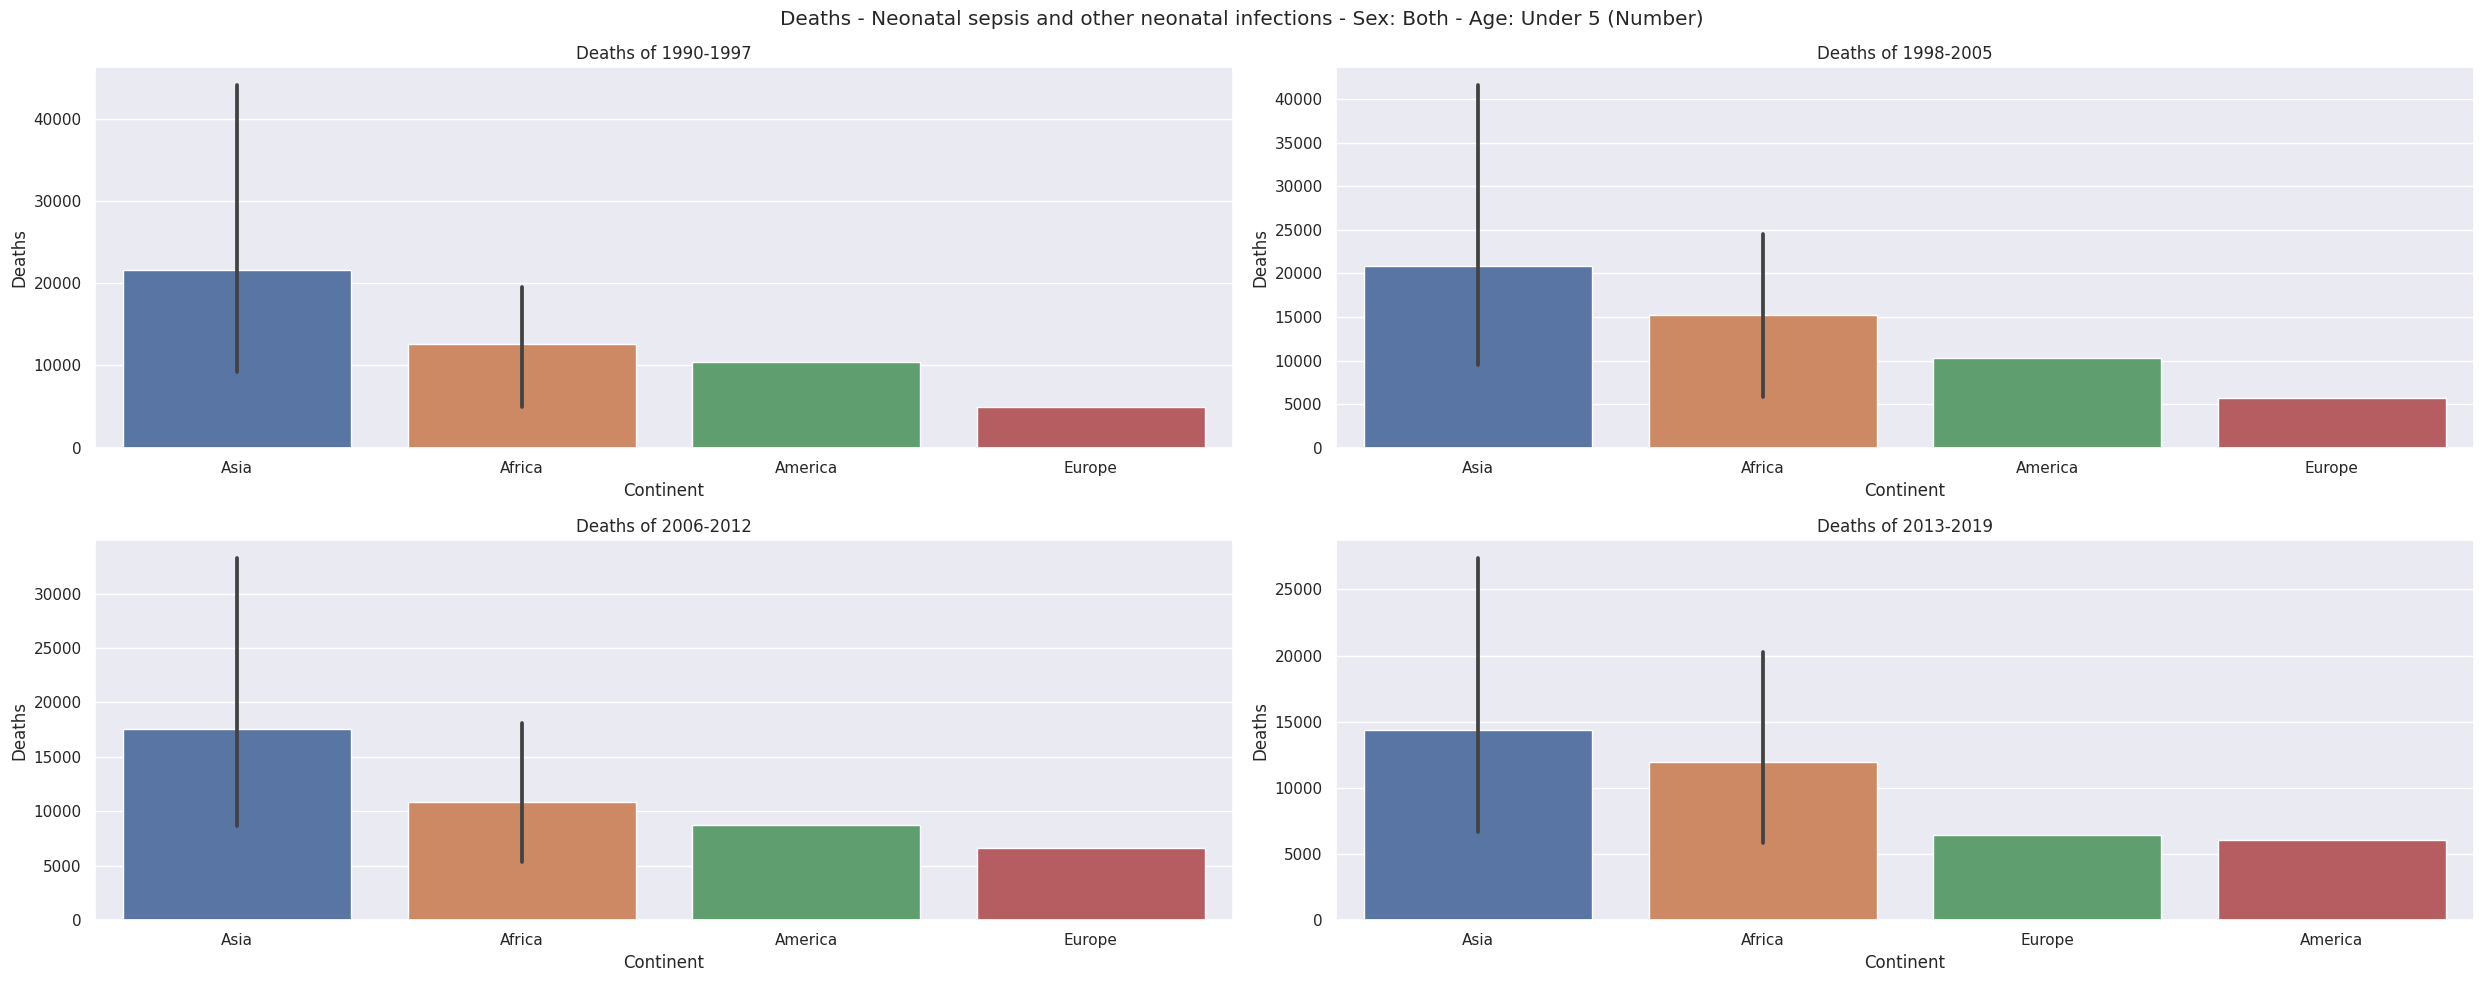

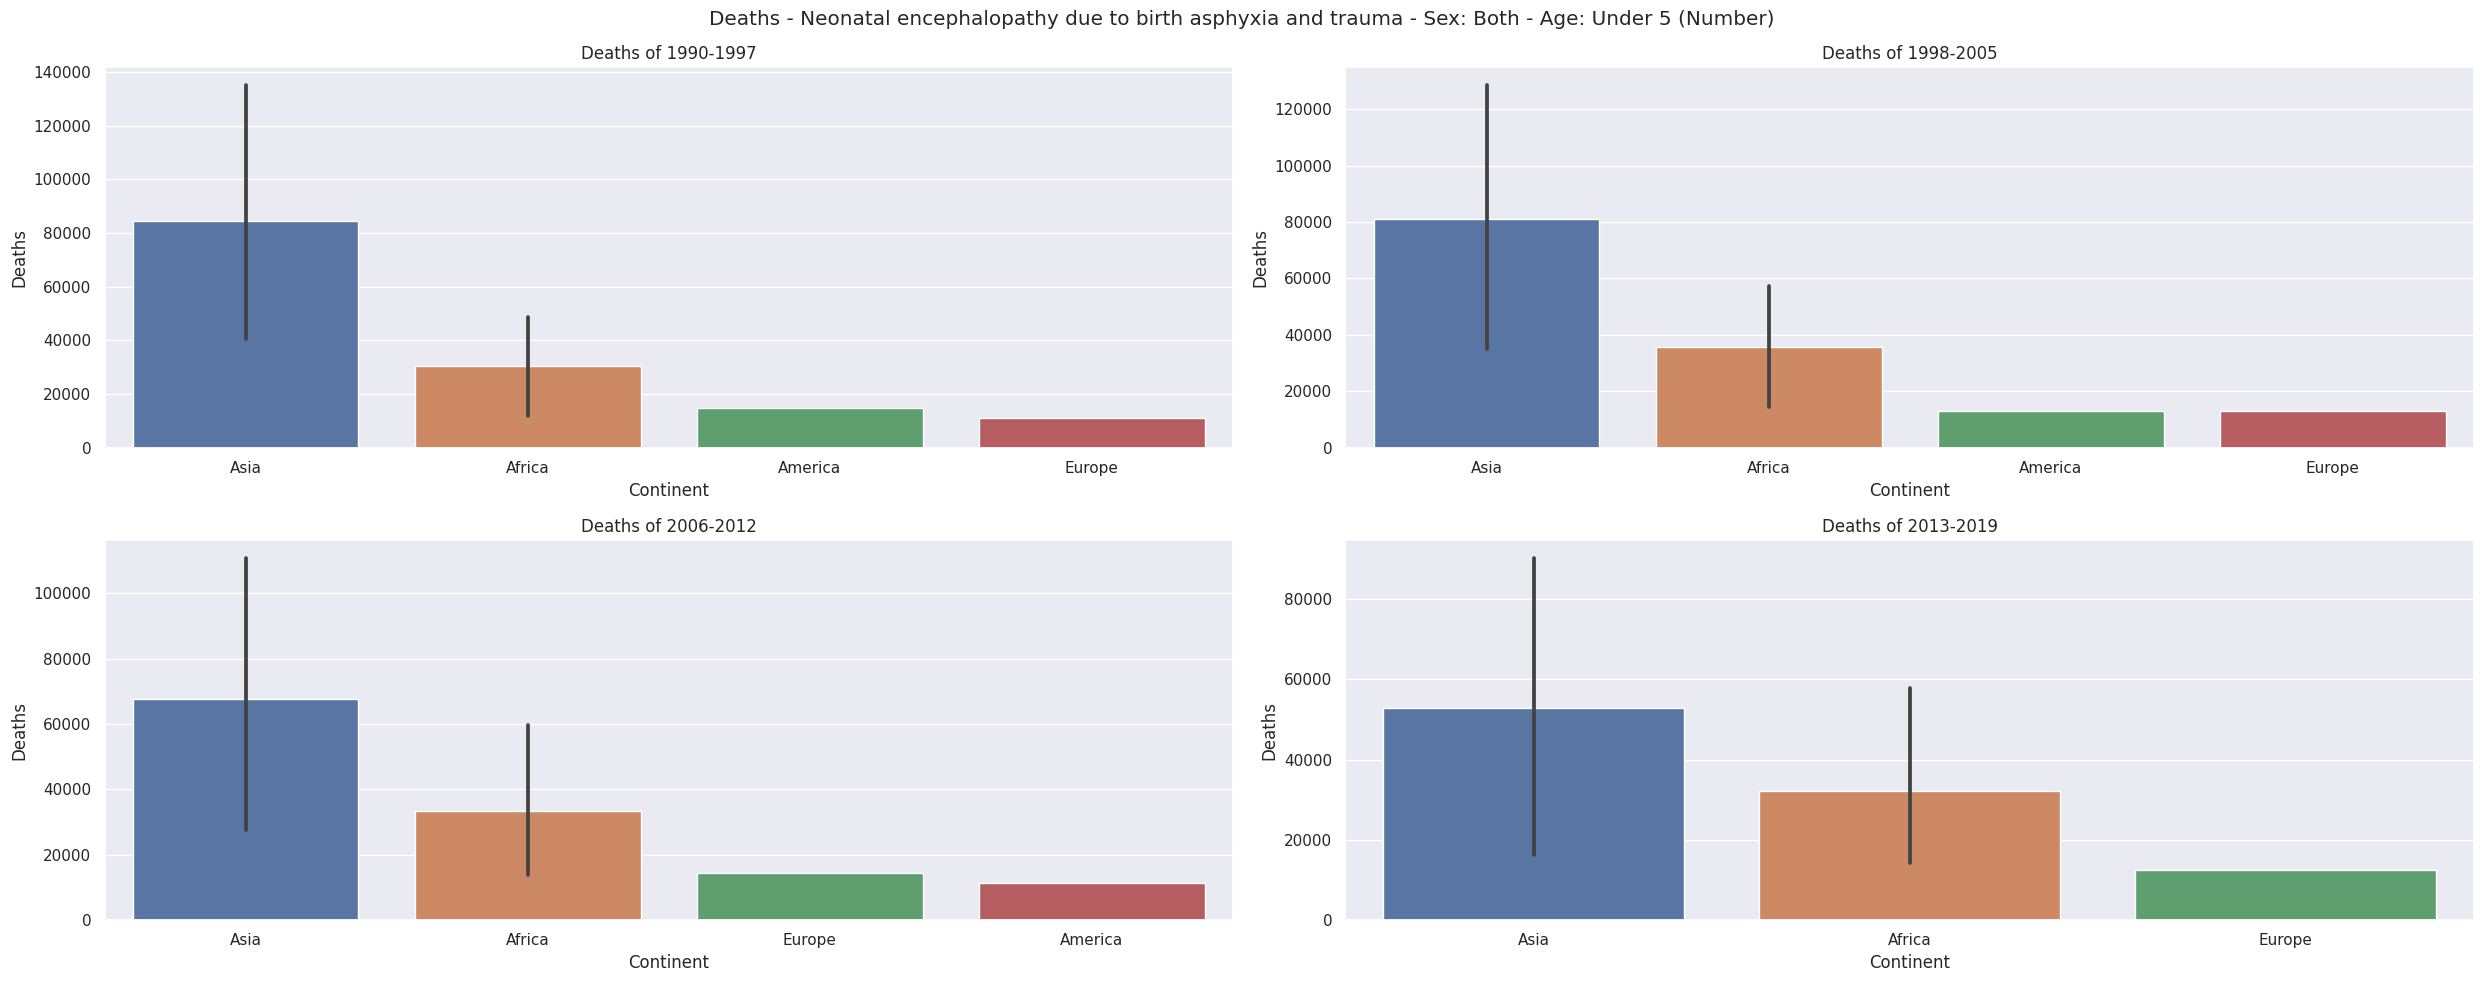

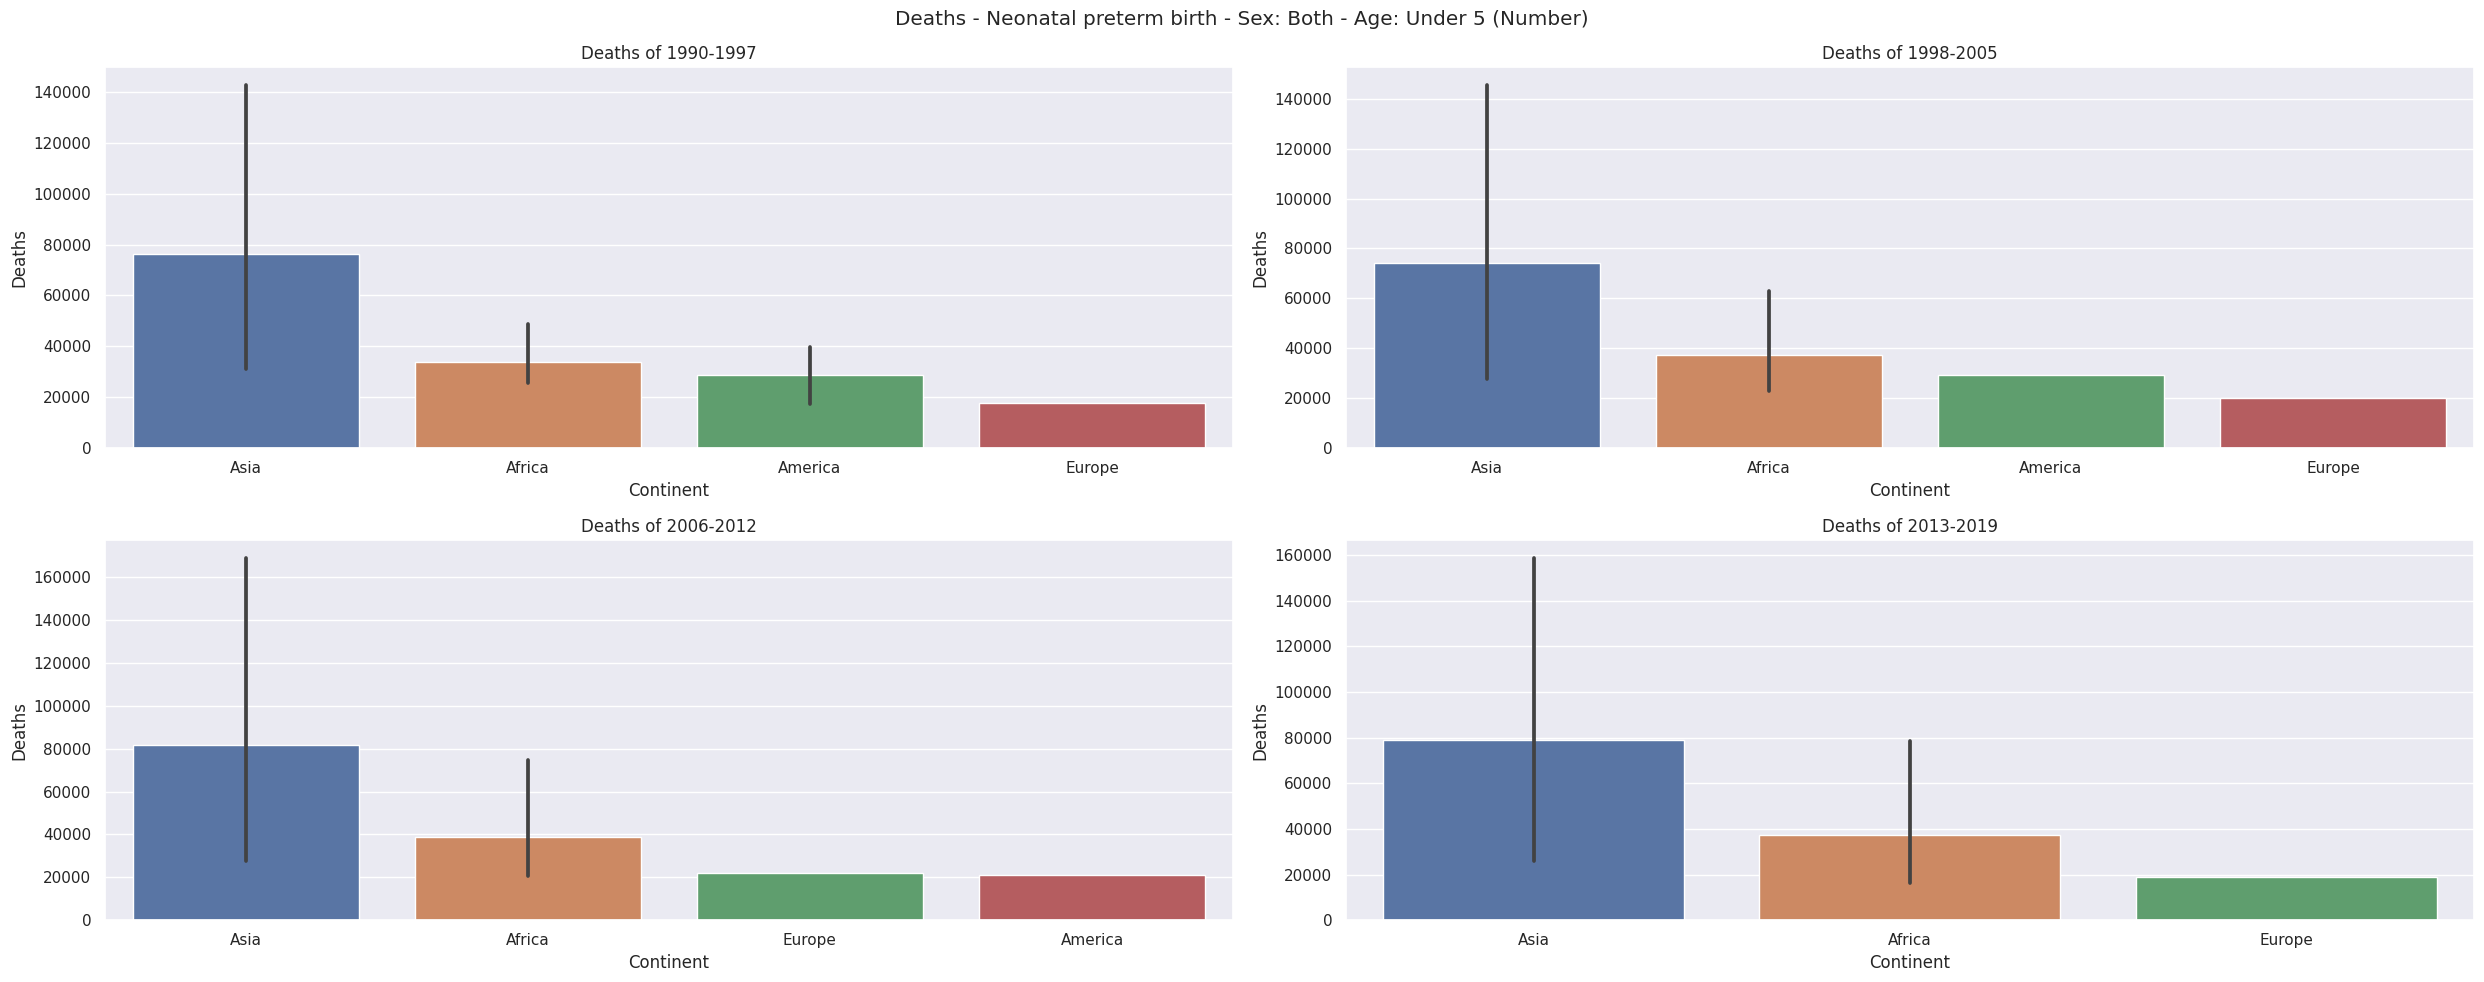

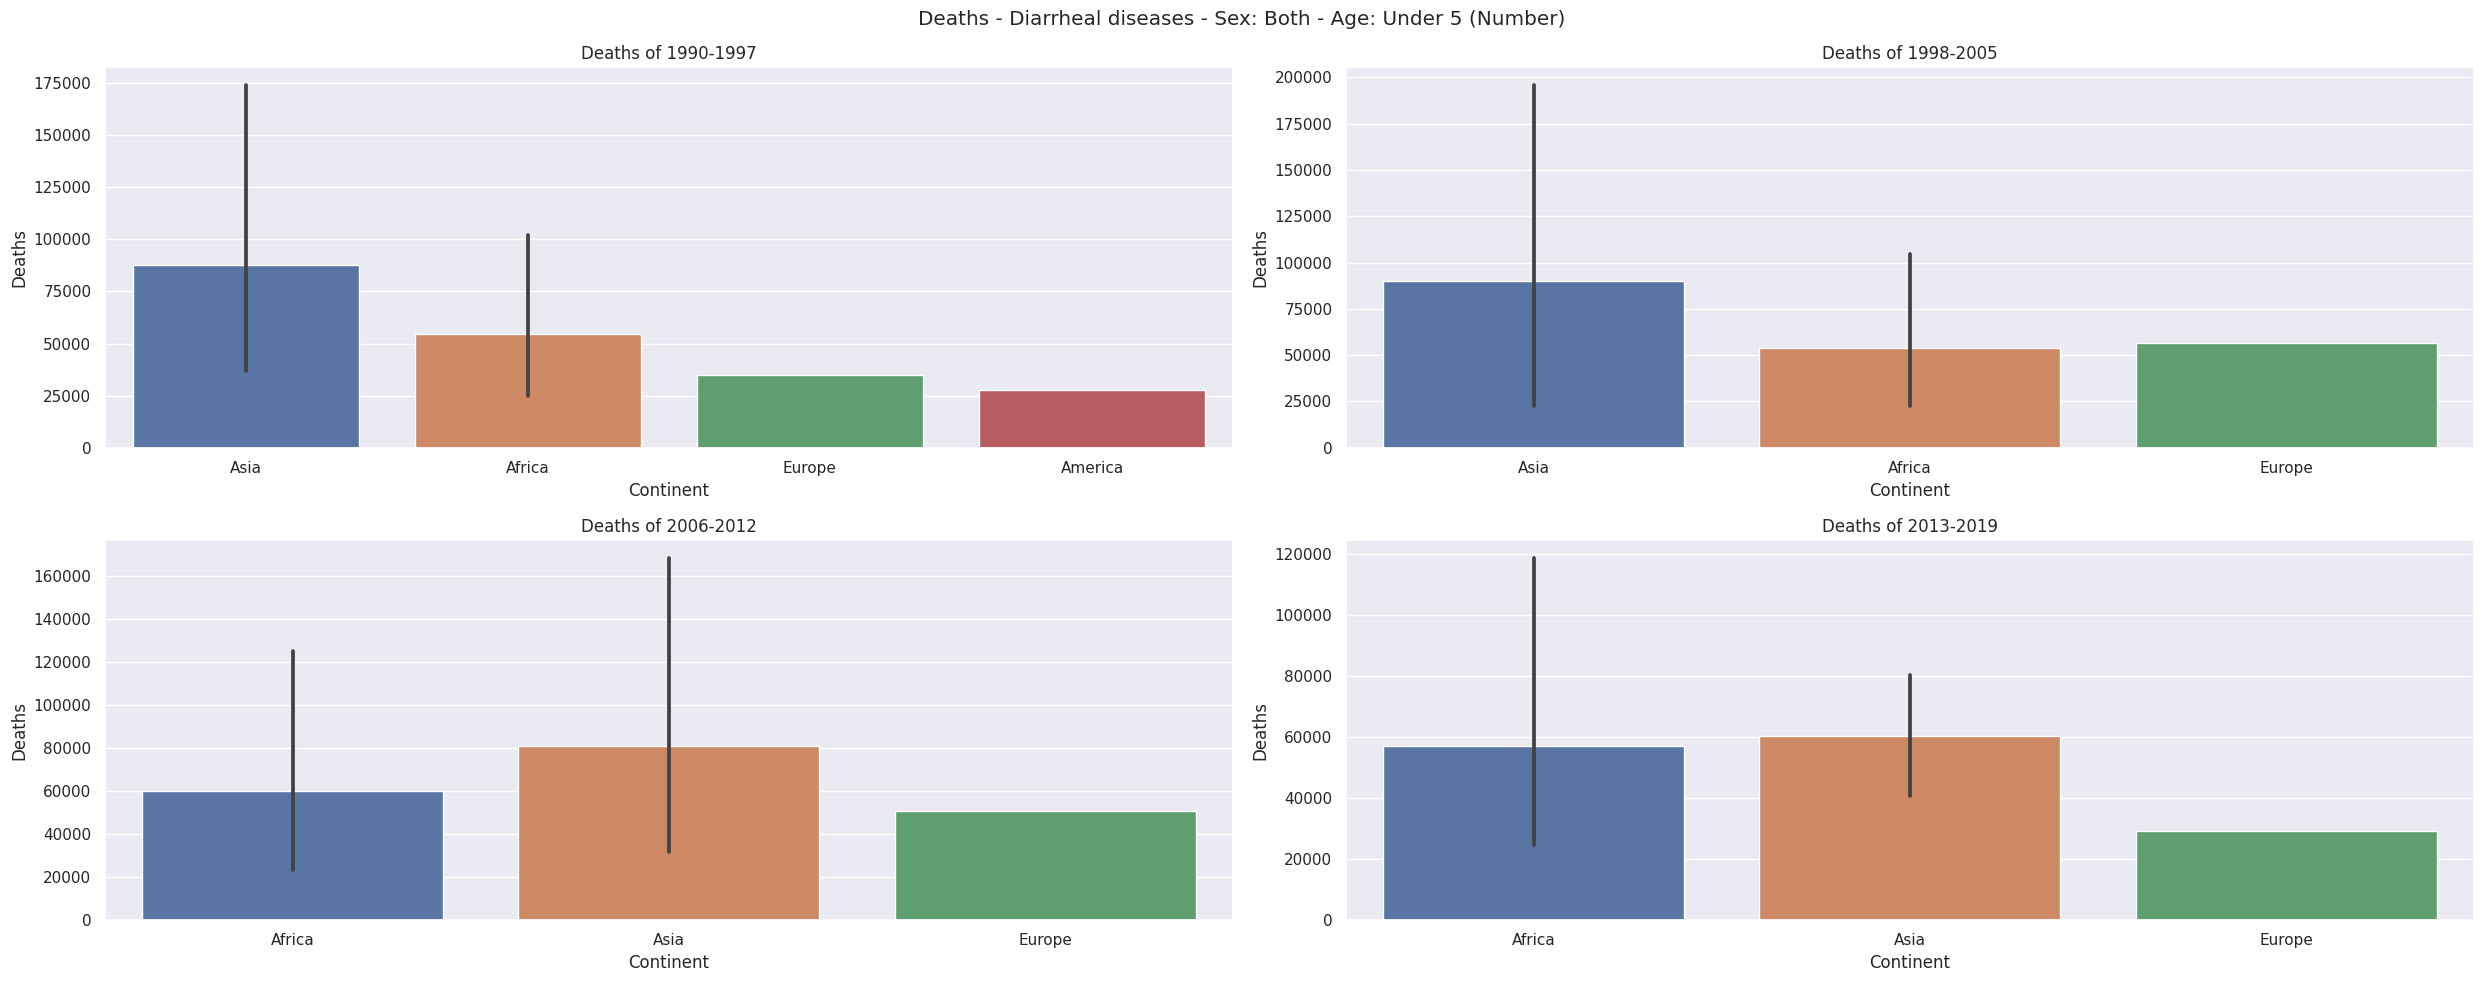

In [54]:
for cause in Deaths_causes_columns:
    plot_causes_by_continent(cause, top=45, all_continents=False)

### Hypothesis Validations 